In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### <b>Abstract</b>
#### <b>Introduction</b>
Cancer death is one of humanity's major problems in the developing world. Despite the fact that there are many ways to prevent it before happening, some cancer types still do not have a treatment. Breast cancer is one of the most common types of cancer, and early detection is crucial in its treatment. It develops from breast tissue when cells in the region grow out of control. One of the key steps in treating breast cancer is  accurate diagnosis.

#### <b>Method</b>
Our main objective is to identify which features are most helpful in predicting malignant or benign cancer from the available Wisconsin Breast Cancer (WBC) Data set and compare different classification algorithms to get better performance measures.

<b>Keywords</b> – Wisconsin Breast cancer data set, data exploration, feature selection, machine learning.

# So, let's get started

<b>This is going to be a 3-part series. Part 1 covers data exploratory data analysis (EDA), Part 2 covers feature selection, modeling and evaluation and whilst Part 3 will dive into the model deployment.</b>

<b>Here, we will learn step-by-step guide to complete the real Data Science project with best performing model that will generalize across unseen data. </b>

 *  [<b>Part 1 - Exploratory data analysis</b>](#eda)  
  <a class="anchor" id="bcImp"></a>
     * [<b>Import libraries & datasets</b>](#importDataset)
     * [<b>Data overview</b>](#dOverview)
          * [About dataset](#aboutDataset)
          * [Health check up of the dataset](#charDataset)
          * [<b>In summary</b>](#summaryData)
     * [<b>Statistical overview</b>](#sOverview)
          * [Describe the dataset](#desDataset)
          * [Analysis of outcome feature (<b>'diagnosis'</b>)](#distOutcome)
          * [<b>In summary</b>](#5noSummaryData)
          * [<b>Distributions</b>](#distributions)
               * [Check distribution of all continuous independent features](#distIndependent)
               * [Exploring data using violinplot](#violinplot)
               * [Exploring data using swarmplot](#swarmplot)
               * [<b>In summary</b>](#summaryDistribution)
          * [<b>Relationship</b>](#relationship)
               * [Exploring data using joint plot](#jointPlot)
               * [Explore pairplots between dependent and independent features](#pairplots)
               * [Check heatmap of continuous features](#heatmap)
               * [<b>In summary</b>](#relationshipSummary)
 * [<b>Part 2 - Feature Selection, Modeling and Evaluation</b>](#evaluation)
      * [Feature selection using voted method](#fs)
      * [Model building](#mBuilding)
      * [Model evaluation](#mEvaluation)
 * [<b>Part 3 - Model Deployment Using Federated Learning</b>](#deployment)
      * [Final model deployment](#fModelDeployment)

## 1.1 Import libraries & datasets <a class="anchor" id="importDataset"></a>
[Back to Table of Contents](#bcImp)

In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
data = pd.read_csv('/content/drive/MyDrive/Secure-Model-Optimization/DATASETS/Breast_Cancer_Wisconsin_Data.csv')

## 1.2 Data overview <a class="anchor" id="dOverview"></a>
[Back to Table of Contents](#bcImp)
### 1.2.1 About dataset <a class="anchor" id="aboutDataset"></a>

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository:
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:
#### 1. ID number
#### 2. Diagnosis (M = malignant, B = benign)
#### 3-32
#### Ten real-valued features are computed for each cell nucleus:
#### a. radius (mean of distances from center to points on the perimeter)
#### b. texture (standard deviation of gray-scale values)
#### c. perimeter
#### d) area
#### e) smoothness (local variation in radius lengths)
#### f. compactness (perimeter^2 / area - 1.0)
#### g. concavity (severity of concave portions of the contour)
#### h. concave points (number of concave portions of the contour)
#### i. symmetry
#### j) fractal dimension ("coastline approximation" - 1)
The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.
Missing attribute values: none
Class distribution: 357 benign, 212 malignant
### 1.2.2 Health check-up of the dataset <a class="anchor" id="charDataset"></a>
[Back to Table of Contents](#bcImp)

“<b>Data quality</b> is one of the most important problems in data management, since dirty data often leads to inaccurate data analytics results and incorrect business decisions by <b>Ihab F. Ilyas (Author), Xu Chu (Author).”</b>

#### Check diamension of the dataset, missing values and data type.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#### Check if the <b>column</b> is unique

In [12]:
print('unique column values')
data.apply(lambda x: len(x.unique())).sort_values(ascending=False).head(10)

unique column values


id                      569
smoothness_se           547
fractal_dimension_se    545
area_worst              544
concave points_mean     542
compactness_se          541
radius_se               540
concavity_worst         539
area_mean               539
compactness_mean        537
dtype: int64

We found only <b>ID column</b> is unique.

#### Missing value analysis

In [13]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

There is <b>no missing values</b>.

#### Drop unnecessary <b>column</b> from dataset

In [14]:

# Get column names
col = data.columns
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


We can exclude unnecessary columns from the dataset and separate dependent (y) and and independent(X) data:
* <b>There is an id that cannot be used for classification.</b>
*  <b>Diagnosis is our class label.</b>
*  <b>Unnamed: 32 feature includes NaN so we do not need it.</b>

In [15]:

# y includes our outcome label and X includes our features
y = data.diagnosis # M or B
list_drp = ['id','diagnosis']
X = data.drop(list_drp,axis = 1 )

<b>Check duplicate records</b>

In [16]:

# calculate duplicates
dups = X.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(X[dups])

False
Empty DataFrame
Columns: [radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, fractal_dimension_worst]
Index: []

[0 rows x 30 columns]


##  In summary <a class="anchor" id = "summaryData"></a>
[Back to Table of Contents](#bcImp)

We can conclude that:
<ul>
    <li>There are <b>569</b> instances of <b>data</b>.</li>
    <li>Total number of <b>features</b> equals <b>33</b>, of which <b>31 is numerical, </b> plus <b>Id</b> and <b>diagnosis.</b></li>
    <li>One <b>feature (Unnamed: 32)</b> has missing values in the dataset</li>
    <li> There is one unique column which is <b>'Id'</b></li>
    <li> No <b>duplicate</b> records</li>
 </ul>

##  1.3 Statistical overview <a class="anchor" id = "sOverview"></a>
[Back to Table of Contents](#bcImp)

### 1.3.1 Description of the dataset<a class="anchor" id="desDataset"></a>
[Back to Table of Contents](#bcImp)

Statistical information can be viewed in the below table. For numerical parameters, fields like mean, standard deviation, percentiles, and maximum have been populated. This gives us a broad idea of our dataset.

In [17]:

X.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='coolwarm')

### 1.3.2 Analysis of the outcome variable (diagnosis)<a class="anchor" id="distOutcome"></a>
[Back to Table of Contents](#bcImp)

<Axes: xlabel='diagnosis', ylabel='count'>

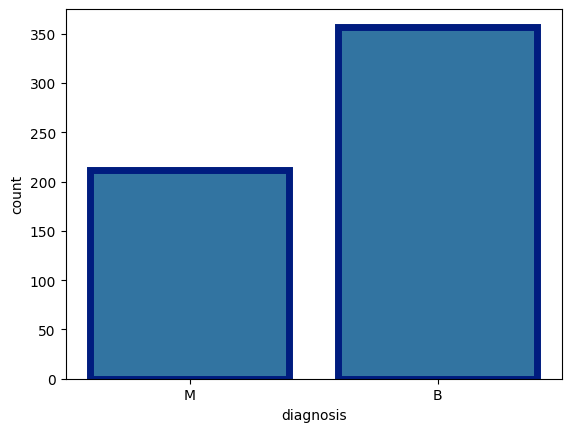

In [18]:
## understand the diagonosis data distribution
sns.countplot(x = 'diagnosis',linewidth=5, data = data,edgecolor=sns.color_palette("dark",1))

##  In summary <a class="anchor" id = "5noSummaryData"></a>
[Back to Table of Contents](#bcImp)

We can conclude that:
* Important summary statistics of all the numerical variables like the mean, std, min, 25%, 50%, 75%, and max values.
* There is <b>high variation</b> in values in <b>area_mean</b> and <b>area_worst.
* There are many variables have median value 0.
* The <b>area_worst</b> feature’s max value is <b>4254</b> and <b>fractal_dimension_se</b> features’ max <b>0.029840</b>. This indicates we need to standardize or normalize data before visualization, feature selection, and classification.
* <b>Bar plot</b> of <b>diagnosis</b> shows that <b>Malignant</b> and <b>Benign</b> patients ratio is <b>37% (212/569)</b> and <b>63% (357/569)</b> respectively.

## 1.3.3 Distributions<a class="anchor" id="distributions"></a>

### 1.3.3.1 Distribution of all numerical independent features<a class="anchor" id="distIndependent"></a>
[Back to Table of Contents](#bcImp)

We applied <b>Shapiro–Wilk test</b> to all the numerical features to check whether they follow a normal distribution or not.

In [19]:

# Check normal distribution of all numerical features
test_normality = lambda x: stats.shapiro(x.fillna(0))[1] < 0.01
normal = pd.DataFrame(X)
normal = normal.apply(test_normality)
print(not normal.any())

False


And the result is <b>False</b> means none of the numerical features follow the normal distribution.

#### 1.3.3.2 Exploring data using violinplot<a class="anchor" id="violinplot"></a>
[Back to Table of Contents](#bcImp)

A violinplot is a graphical representation of data where values are depicted by color. A violin plot pursues the same activity that a whisker or box plot does.

Before plotting our data we need to normalization or standardization. Because differences between values of features are very high to observe on plot. We plot features in two groups and each group includes 15 features to observe better.

<b>Violin plot for first 15 features (1-15).</b>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean'),
  Text(10, 0, 'radius_se'),
  Text(11, 0, 'texture_se'),
  Text(12, 0, 'perimeter_se'),
  Text(13, 0, 'area_se'),
  Text(14, 0, 'smoothness_se')])

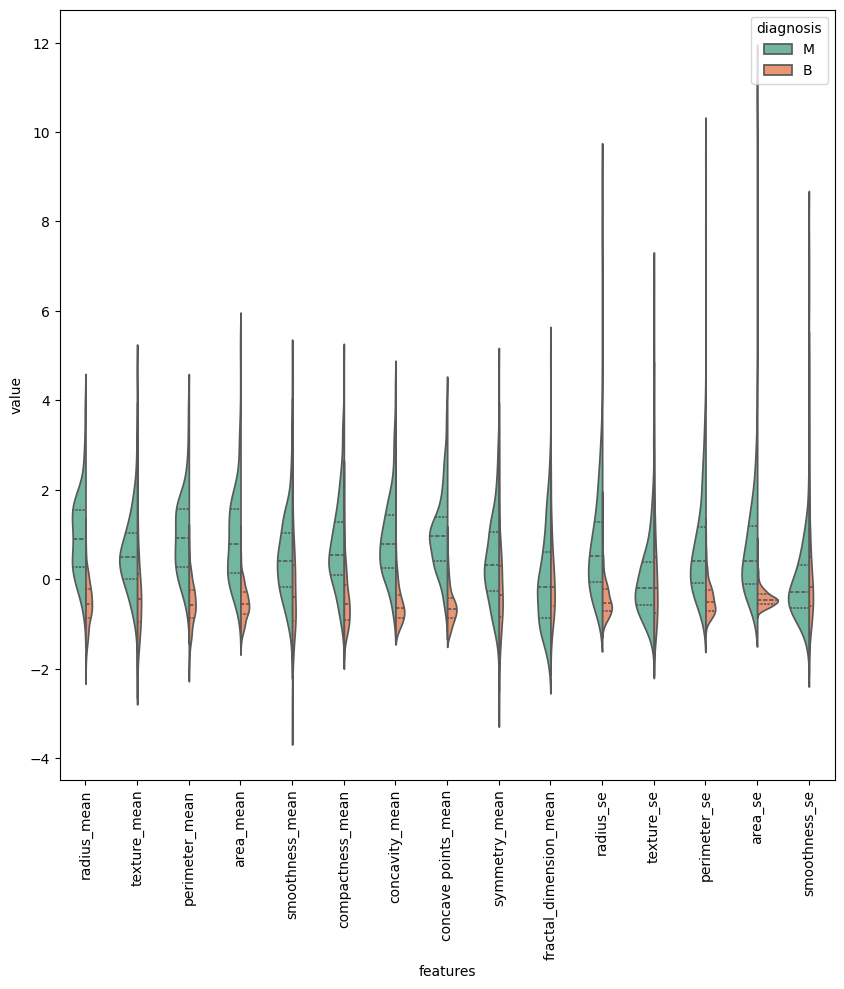

In [20]:

# First 15 features
data_dia = y
data = X
# standardization of the data
data_n_2 = (data - data.mean()) / (data.std())
data = pd.concat([y,data_n_2.iloc[:,0:15]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart",palette ="Set2")
plt.xticks(rotation=90)

Lets interpret the plot above together. Green represents Malignant cases and orange Benign. For example, in <b>radius_mean,texture_mean,perimeter_mean, area_mean, compactness_mean, concavity_mean and concave_points_mean</b> features, median of the Malignant and Benign looks like separated so it can be good for classification. However, in <b>fractal_dimension_mean, texture_se, and smoothness_se features</b>, median of the Malignant and Benign does not looks like separated so it does not gives good information for classification.

<b>Violin plot for next 15 features (15-30).</b>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'compactness_se'),
  Text(1, 0, 'concavity_se'),
  Text(2, 0, 'concave points_se'),
  Text(3, 0, 'symmetry_se'),
  Text(4, 0, 'fractal_dimension_se'),
  Text(5, 0, 'radius_worst'),
  Text(6, 0, 'texture_worst'),
  Text(7, 0, 'perimeter_worst'),
  Text(8, 0, 'area_worst'),
  Text(9, 0, 'smoothness_worst'),
  Text(10, 0, 'compactness_worst'),
  Text(11, 0, 'concavity_worst'),
  Text(12, 0, 'concave points_worst'),
  Text(13, 0, 'symmetry_worst'),
  Text(14, 0, 'fractal_dimension_worst')])

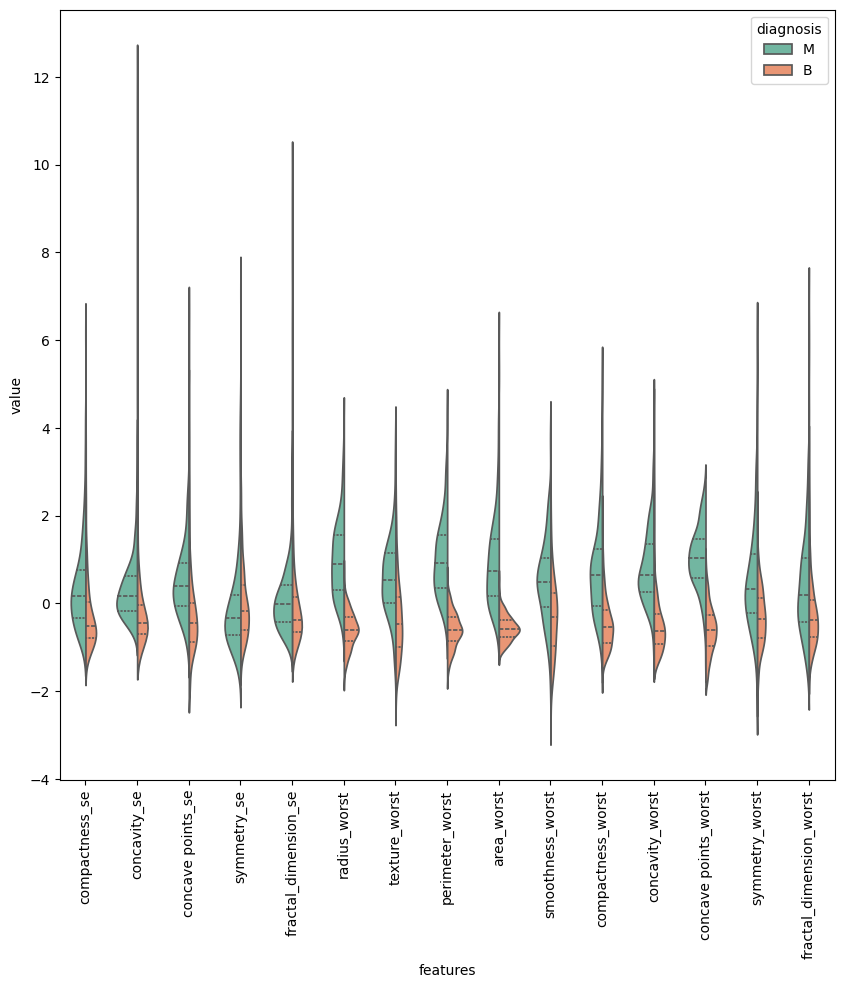

In [21]:

# Next 15 features
data = pd.concat([y,data_n_2.iloc[:,15:30]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart",palette ="Set2")
plt.xticks(rotation=90)

Lets interpret one more thing about plots above, variable of <b>texture_se, smoothness_se, concavity_worst, and concave point_worst looks like similar</b> but how can we decide whether they are correlated with each other or not. (Not always true but, basically if the features are correlated with each other we can drop one of them)


#### 1.3.3.3 Exploring data using swarmplot<a class="anchor" id="swarmplot"></a>
[Back to Table of Contents](#bcImp)

A swarm plot is very similar to a strip plot. It is basically a scatter plot where the x axis represents a categorical variable. Typical uses of a strip plot involves applying a small random jitter value to each data point such that the separation between points becomes clearer:

Before plotting our data we need to normalization or standardization. Because differences between values of features are very high to observe on plot. I plot features in two groups and each group includes 15 features to observe better.

<b>Swarm plot for first 15 features (1-15).</b>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean'),
  Text(10, 0, 'radius_se'),
  Text(11, 0, 'texture_se'),
  Text(12, 0, 'perimeter_se'),
  Text(13, 0, 'area_se'),
  Text(14, 0, 'smoothness_se')])

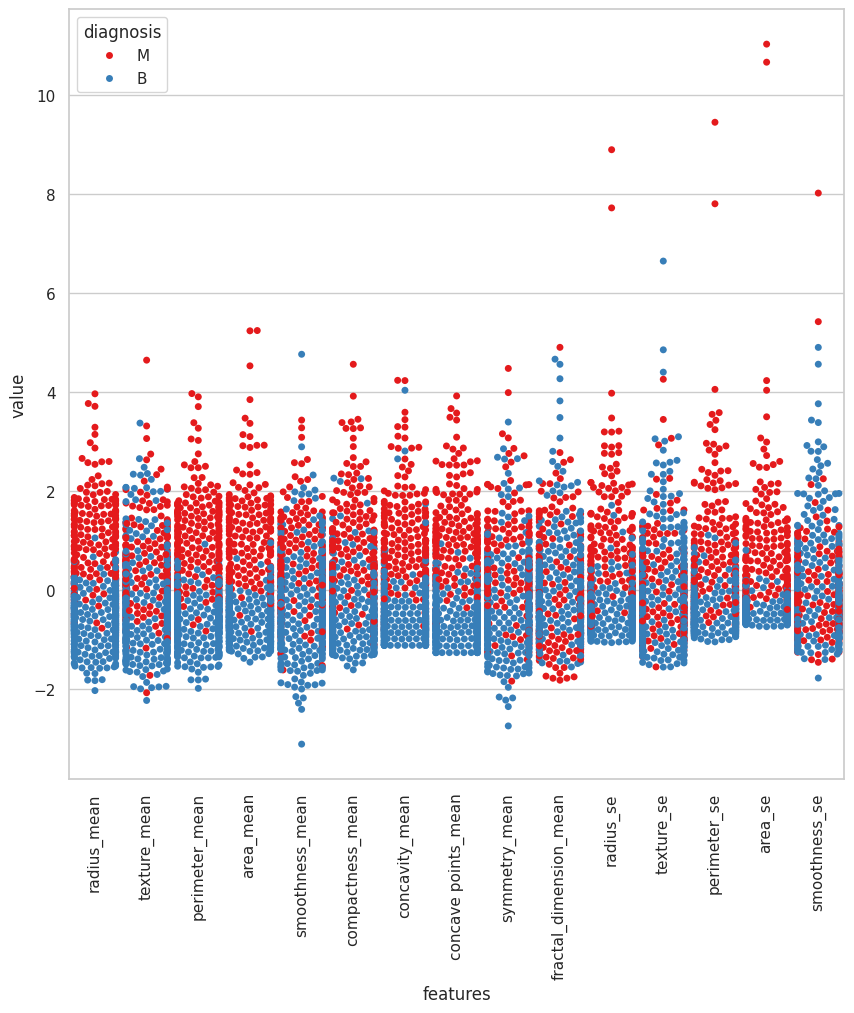

In [22]:

# First 15 features
sns.set(style="whitegrid", palette="Set1")
data_dia = y
data = X
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:15]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
#tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

Each dot represents a cancer patients. Red indicates Malignant and blue Benign pateints. They looks cool right and we can see variance more clear. Let me ask you a question, in these two plots which feature looks like more clear in terms of classification. In my opinion <b>radius_mean, area_se</b> in the above swarm plot looks like malignant and benign are separated not totally but mostly. However, <b>smoothness_mean,symmetry_mean, fractal_dimension_mean, and texture_mean</b> in the above swarm plot looks like malignant and benign are mixed so it is hard to classify while using these feature.

<b>Swarm plot for next 15 features (15-30).</b>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'compactness_se'),
  Text(1, 0, 'concavity_se'),
  Text(2, 0, 'concave points_se'),
  Text(3, 0, 'symmetry_se'),
  Text(4, 0, 'fractal_dimension_se'),
  Text(5, 0, 'radius_worst'),
  Text(6, 0, 'texture_worst'),
  Text(7, 0, 'perimeter_worst'),
  Text(8, 0, 'area_worst'),
  Text(9, 0, 'smoothness_worst'),
  Text(10, 0, 'compactness_worst'),
  Text(11, 0, 'concavity_worst'),
  Text(12, 0, 'concave points_worst'),
  Text(13, 0, 'symmetry_worst'),
  Text(14, 0, 'fractal_dimension_worst')])

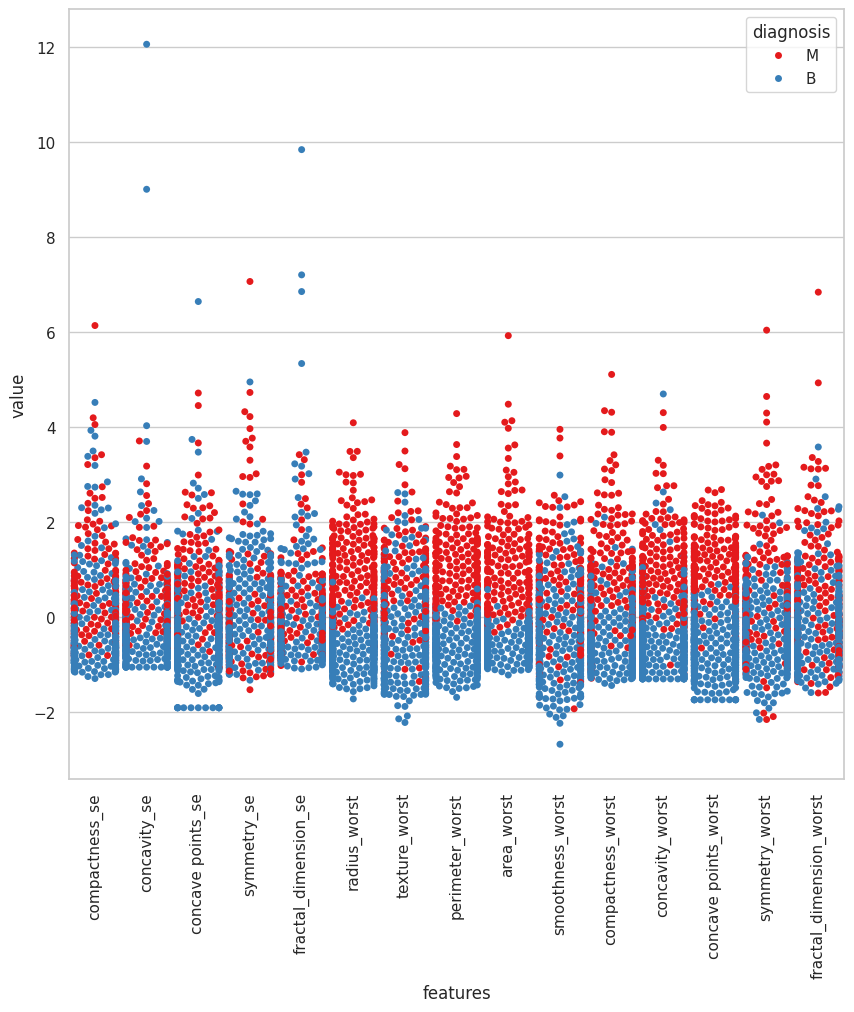

In [23]:

# Next 15 features
data = pd.concat([y,data_n_2.iloc[:,15:30]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

Smilarly, in my opinion <b>radius_worst, area_worst</b> in the above swarm plot looks like malignant and benign are separated not totally but mostly. However, <b>compactness_se,symmetry_se, and smoothness_worst</b> in the above swarm plot looks like malignant and benign are mixed so it is hard to classify while using these feature.

##  In summary <a class="anchor" id = "summaryDistribution"></a>
[Back to Table of Contents](#bcImp)

We can conclude that:
* <b>None</b> of the continuous feature follows normal distribution.
* vialinplot and swarmplot can be used to see the distribution of cases.
* We can interprete from violin plot, features <b>radius_mean,texture_mean,perimeter_mean, area_mean, compactness_mean, concavity_mean, and concave_points_mean</b> may be good for cancer classification.
* Pair of variables of <b>(concavity_worst, and concave point_worst), (concavity_mean and concave point_mean), and (concavity_se and concave point_se)</b> looks like similar. Check correlation between them.
* Swarm plot indicates variables <b>radius_mean, area_se, radius_worst, and area_worst</b> looks like malignant and benign are separated not totally but mostly.

## 1.3.4 Relationship<a class="anchor" id="relationship"></a>
[Back to Table of Contents](#bcImp)
#### 1.3.4.1 Exploring data using joint plot<a class="anchor" id="jointPlot"></a>
[Back to Table of Contents](#bcImp)

Check both the distribution and relationship between two variables. From above information from violin and swarm plot, lets check the correlation between similar variables.

<b>Check correlation between concavity_worst and concave point_worst using joint plot.</b>


Text(0.1, 0.9, '$\\rho = 0.855, p = 0.000$')

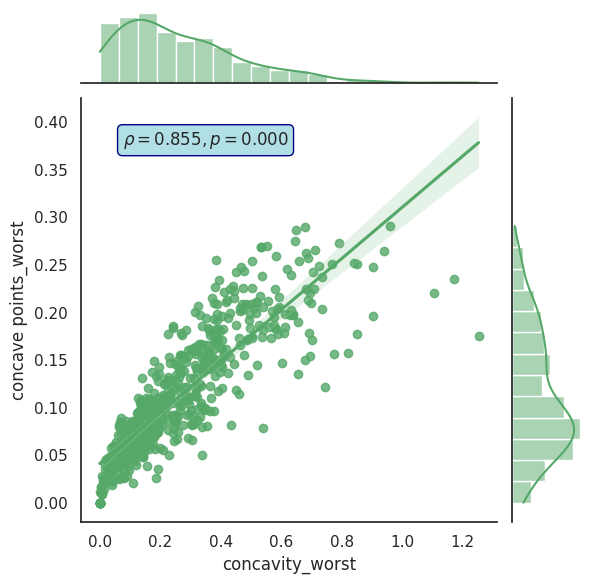

In [24]:

import scipy.stats as stats
import seaborn as sns

sns.set(style="white", color_codes=True)

concav_worst = X['concavity_worst']
concavepoints_worst = X['concave points_worst']

jp = sns.jointplot(x=concav_worst, y=concavepoints_worst, data=X, kind="reg", color="g")
r, p = stats.pearsonr(X['concavity_worst'], X['concave points_worst'])
jp.ax_joint.annotate(f'$\\rho = {r:.3f}, p = {p:.3f}$',
                    xy=(0.1, 0.9), xycoords='axes fraction',
                    ha='left', va='center',
                    bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})


<b>Check correlation between concavity_mean and concave point_mean using joint plot.</b>

Text(0.1, 0.9, '$\\rho = 0.921, p = 0.000$')

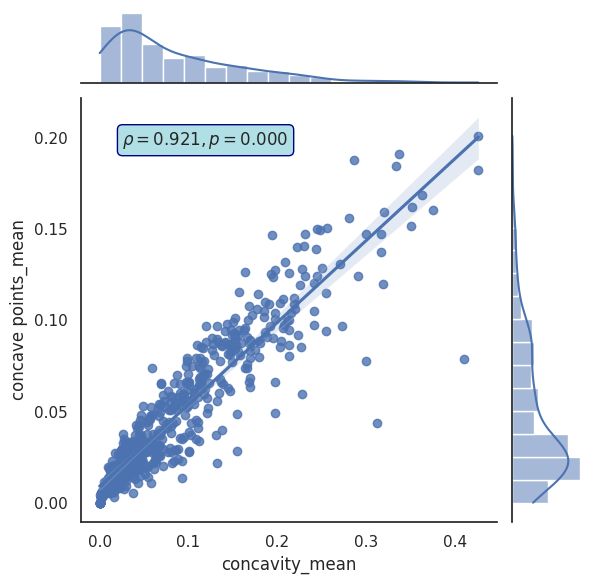

In [25]:

import scipy.stats as stats
import seaborn as sns

sns.set(style="white", color_codes=True)

concav_worst = X['concavity_mean']
concavepoints_worst = X['concave points_mean']

jp = sns.jointplot(x=concav_worst, y=concavepoints_worst, data=X, kind="reg", color="b")
r, p = stats.pearsonr(X['concavity_mean'], X['concave points_mean'])
jp.ax_joint.annotate(f'$\\rho = {r:.3f}, p = {p:.3f}$',
                    xy=(0.1, 0.9), xycoords='axes fraction',
                    ha='left', va='center',
                    bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})


<b>Check correlation between concavity_se and concave point_se using joint plot.</b>

Text(0.1, 0.9, '$\\rho = 0.772, p = 0.000$')

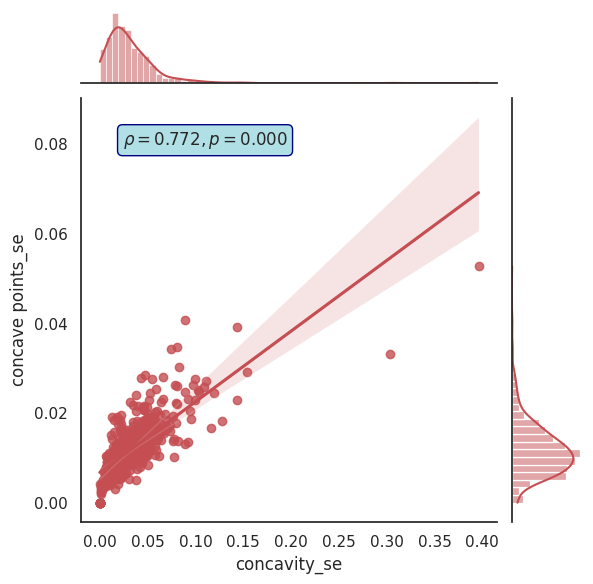

In [26]:

import scipy.stats as stats
import seaborn as sns

sns.set(style="white", color_codes=True)

concav_worst = X['concavity_se']
concavepoints_worst = X['concave points_se']

jp = sns.jointplot(x=concav_worst, y=concavepoints_worst, data=X, kind="reg", color="r")
r, p = stats.pearsonr(X['concavity_se'], X['concave points_se'])
jp.ax_joint.annotate(f'$\\rho = {r:.3f}, p = {p:.3f}$',
                    xy=(0.1, 0.9), xycoords='axes fraction',
                    ha='left', va='center',
                    bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})


#### 1.3.4.2 Explore pairplots between dependent and independent features<a class="anchor" id="pairplots"></a>
[Back to Table of Contents](#bcImp)

Pair plots to check both the distribution of single variable and relationship between two variables.

<b>Pairplot for first six features (1-6).</b>

<Figure size 1000x1000 with 0 Axes>

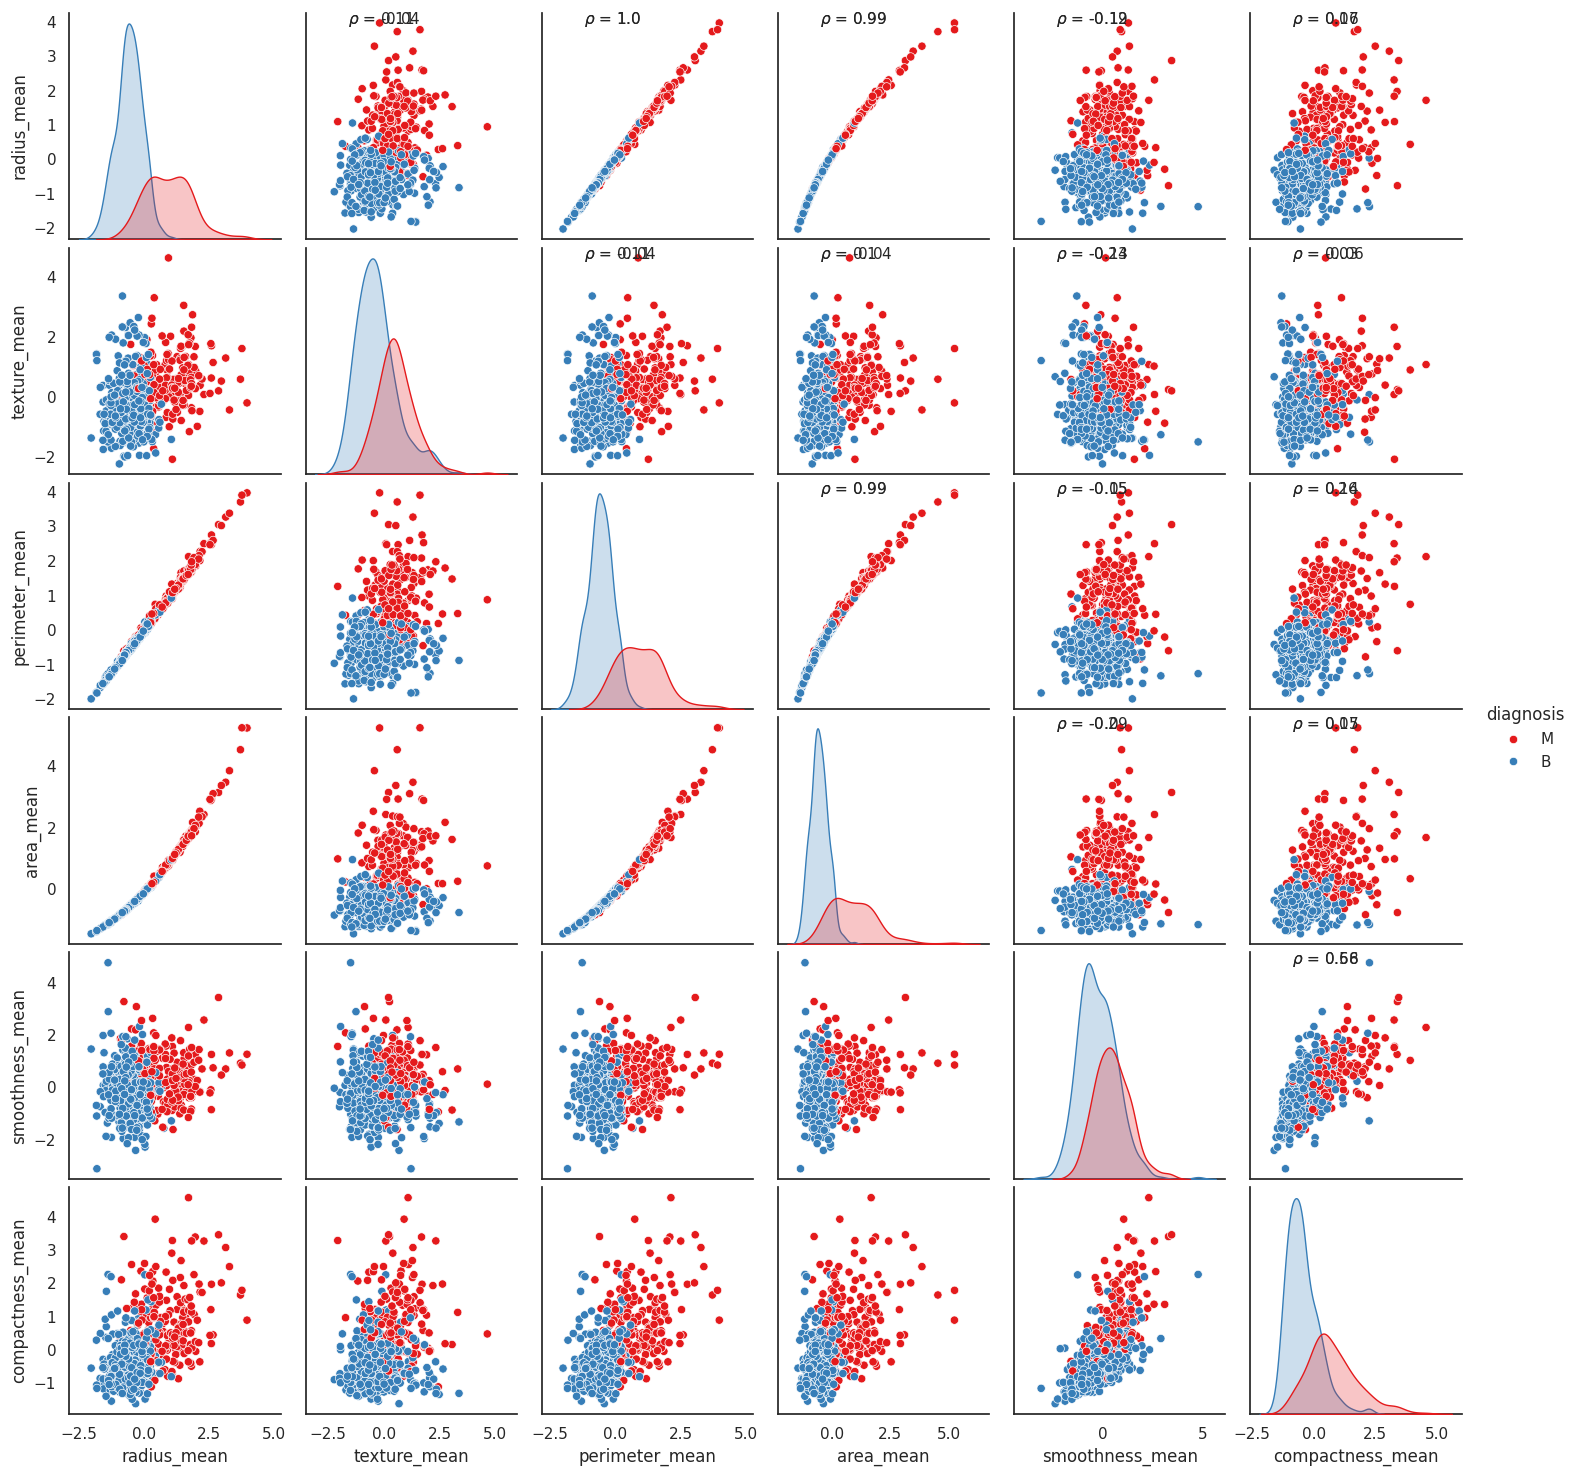

In [27]:

# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):

    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))

    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 11, xycoords = ax.transAxes)
# First six features
data = pd.concat([y,data_n_2.iloc[:,0:6]],axis=1)
plt.figure(figsize=(10,10))
grid=sns.pairplot(data=data,kind ="scatter",hue="diagnosis",palette="Set1")
grid = grid.map_upper(corr)

<b>Pairplot for next six features (7-12).</b>

<Figure size 1000x1000 with 0 Axes>

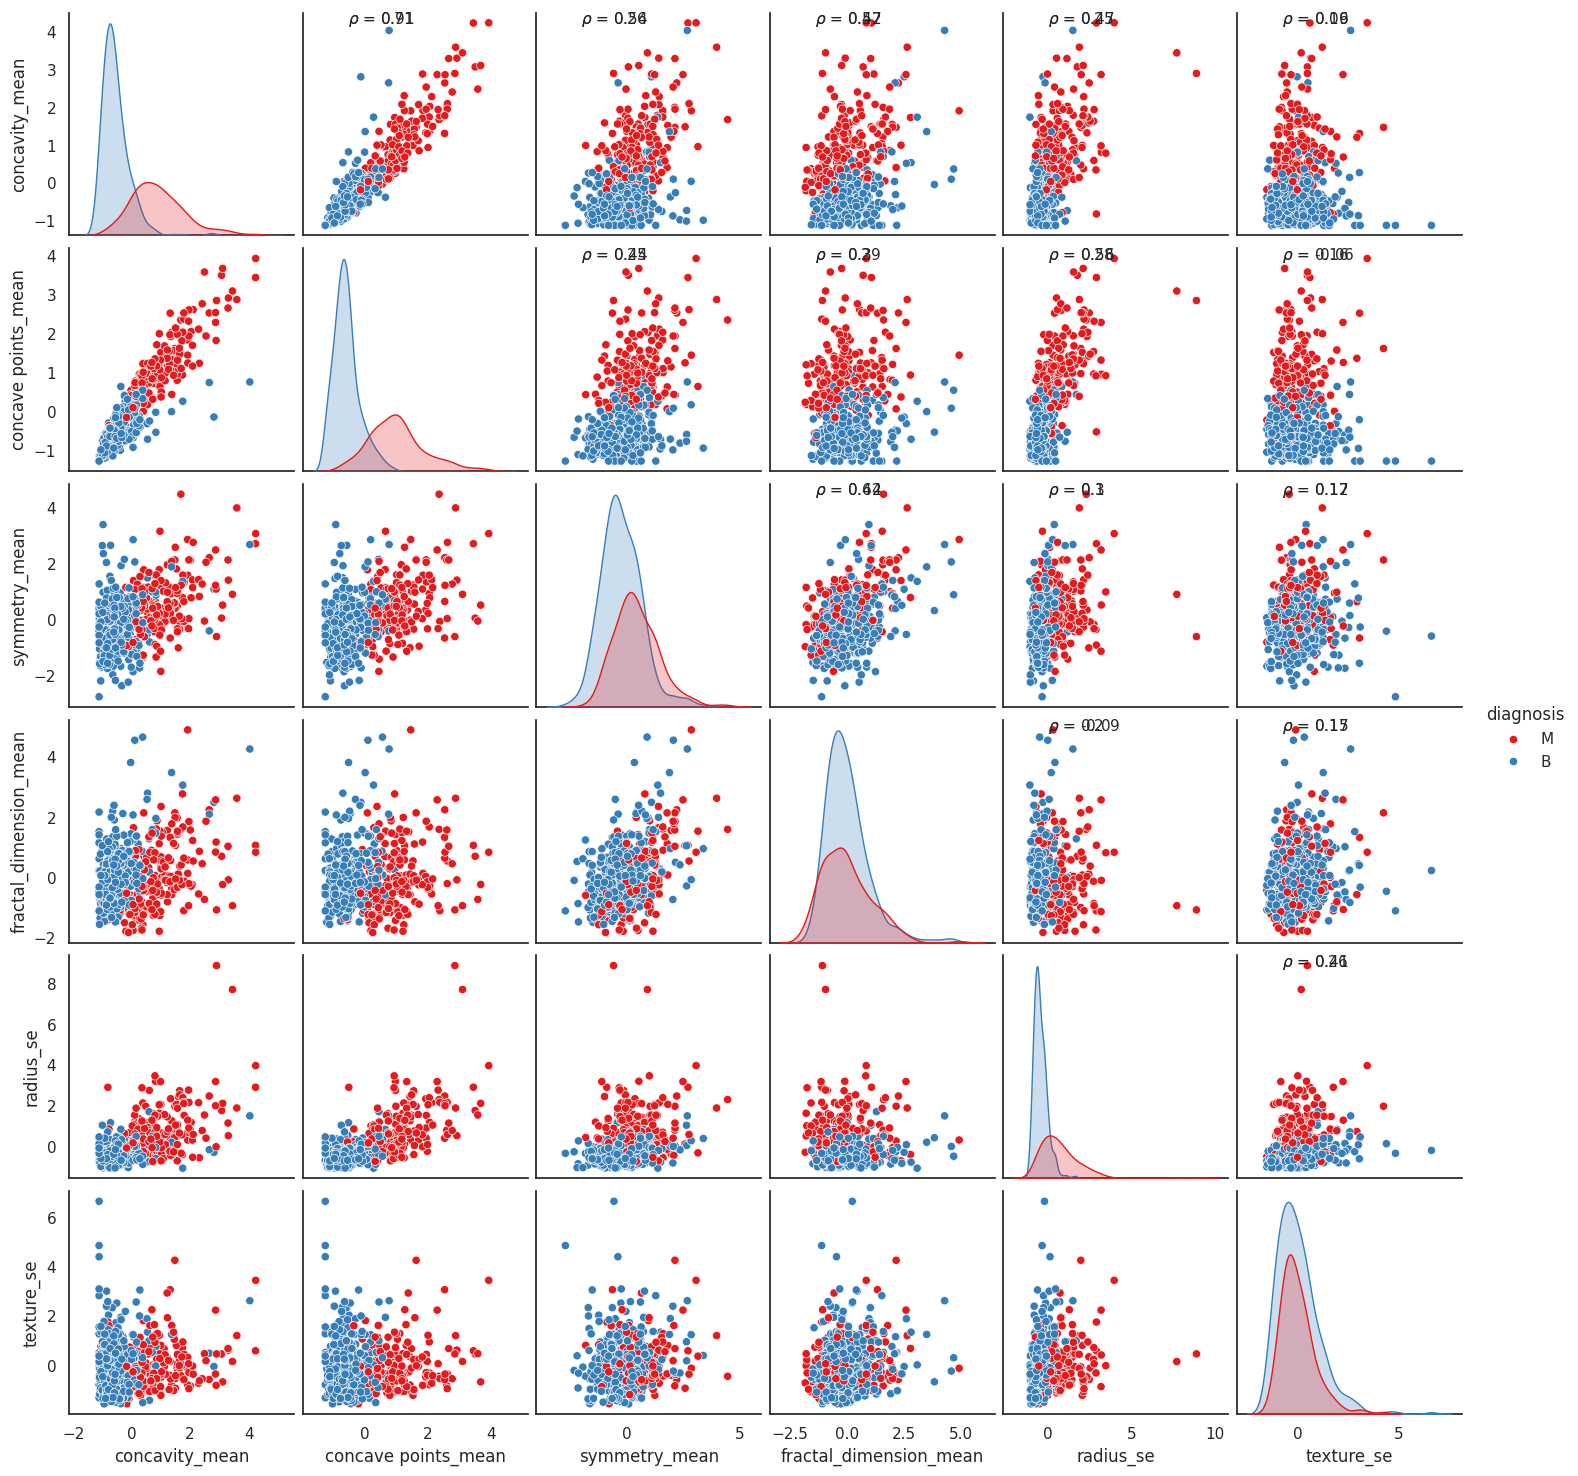

In [28]:
data = pd.concat([y,data_n_2.iloc[:,6:12]],axis=1)
plt.figure(figsize=(10,10))
grid=sns.pairplot(data=data,kind ="scatter",hue="diagnosis",palette="Set1")
grid = grid.map_upper(corr)


<b>Pairplot for next six features (12-18).</b>

<Figure size 1000x1000 with 0 Axes>

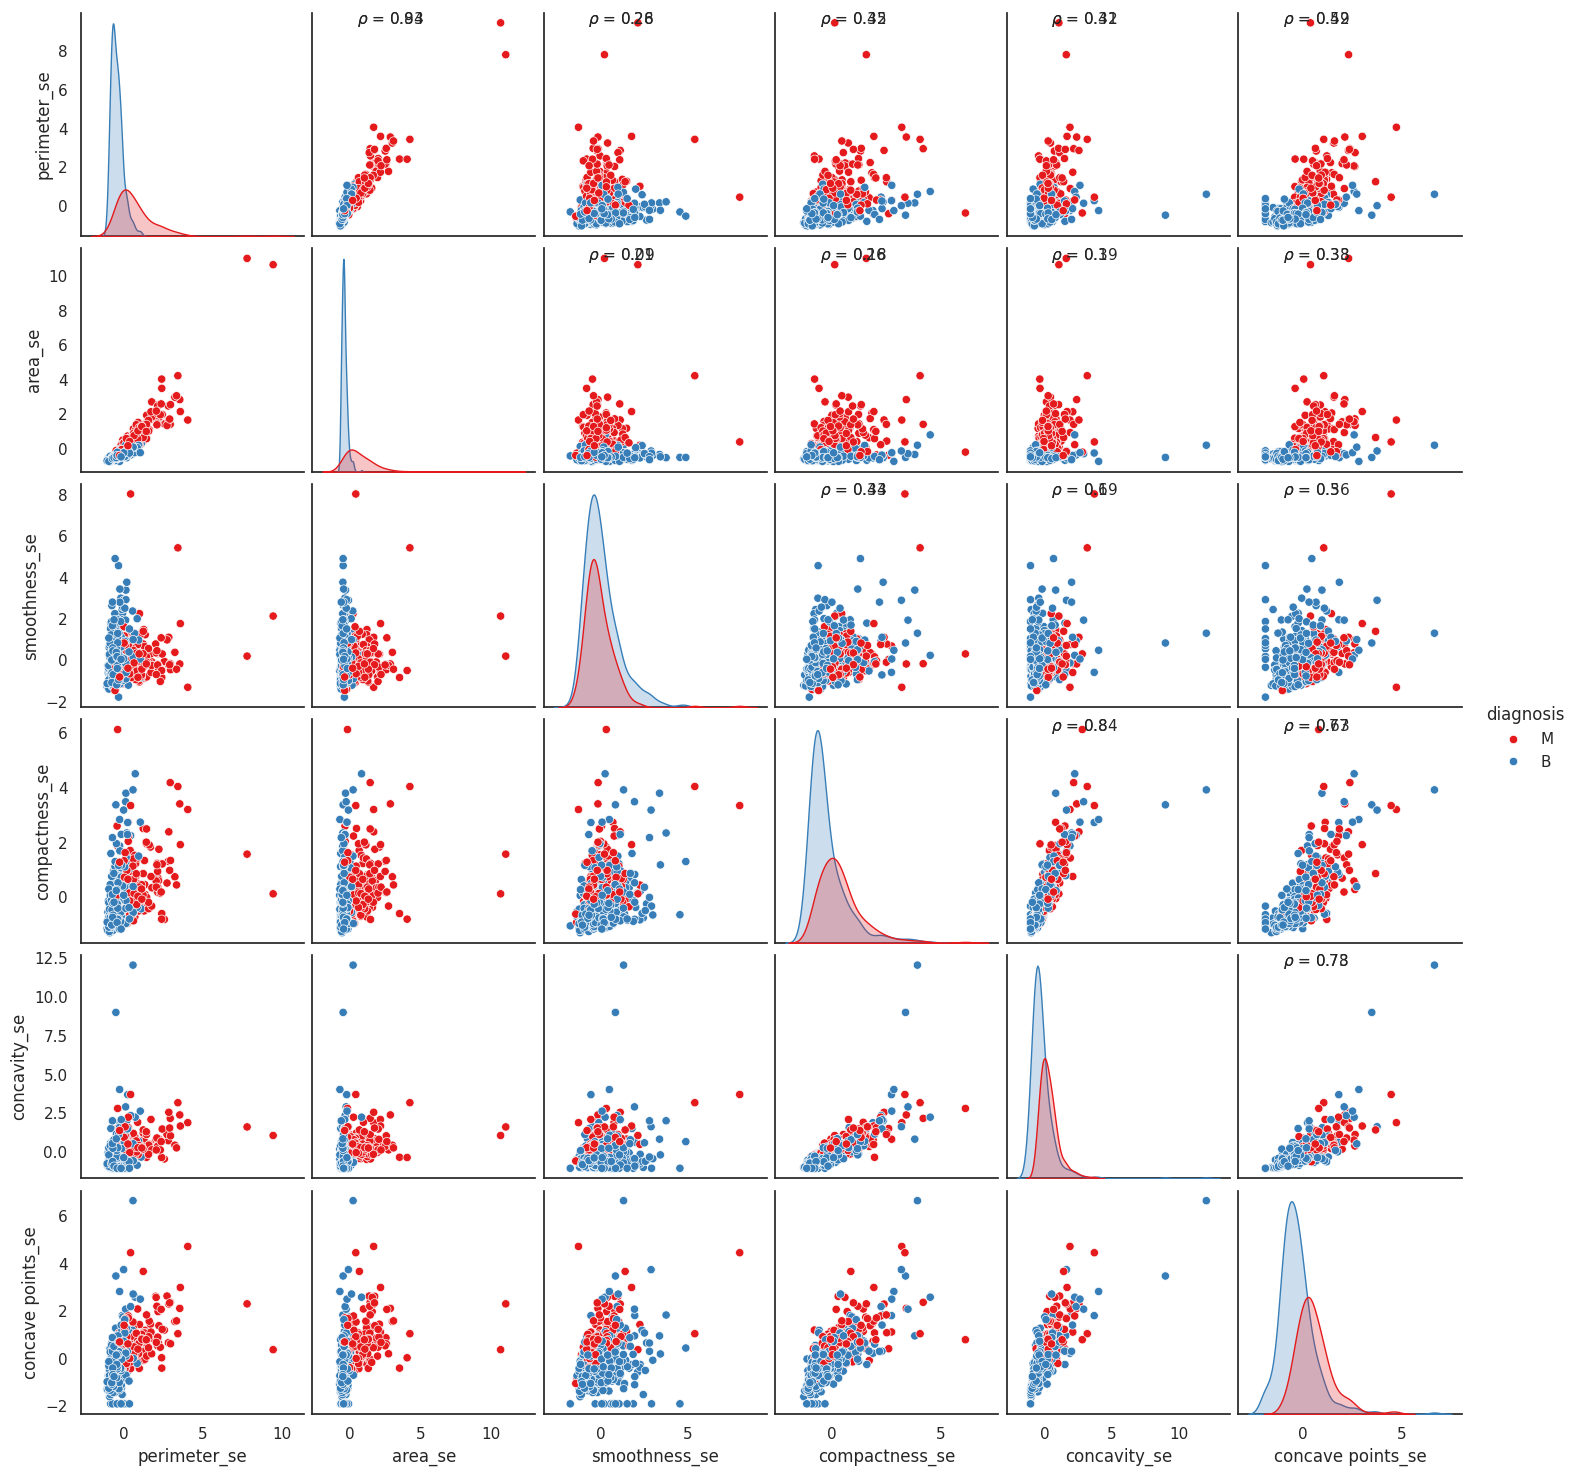

In [29]:
data = pd.concat([y,data_n_2.iloc[:,12:18]],axis=1)
plt.figure(figsize=(10,10))
grid=sns.pairplot(data=data,kind ="scatter",hue="diagnosis",palette="Set1")
grid = grid.map_upper(corr)

<b>Pairplot for next six features (18-24).</b>

<Figure size 1000x1000 with 0 Axes>

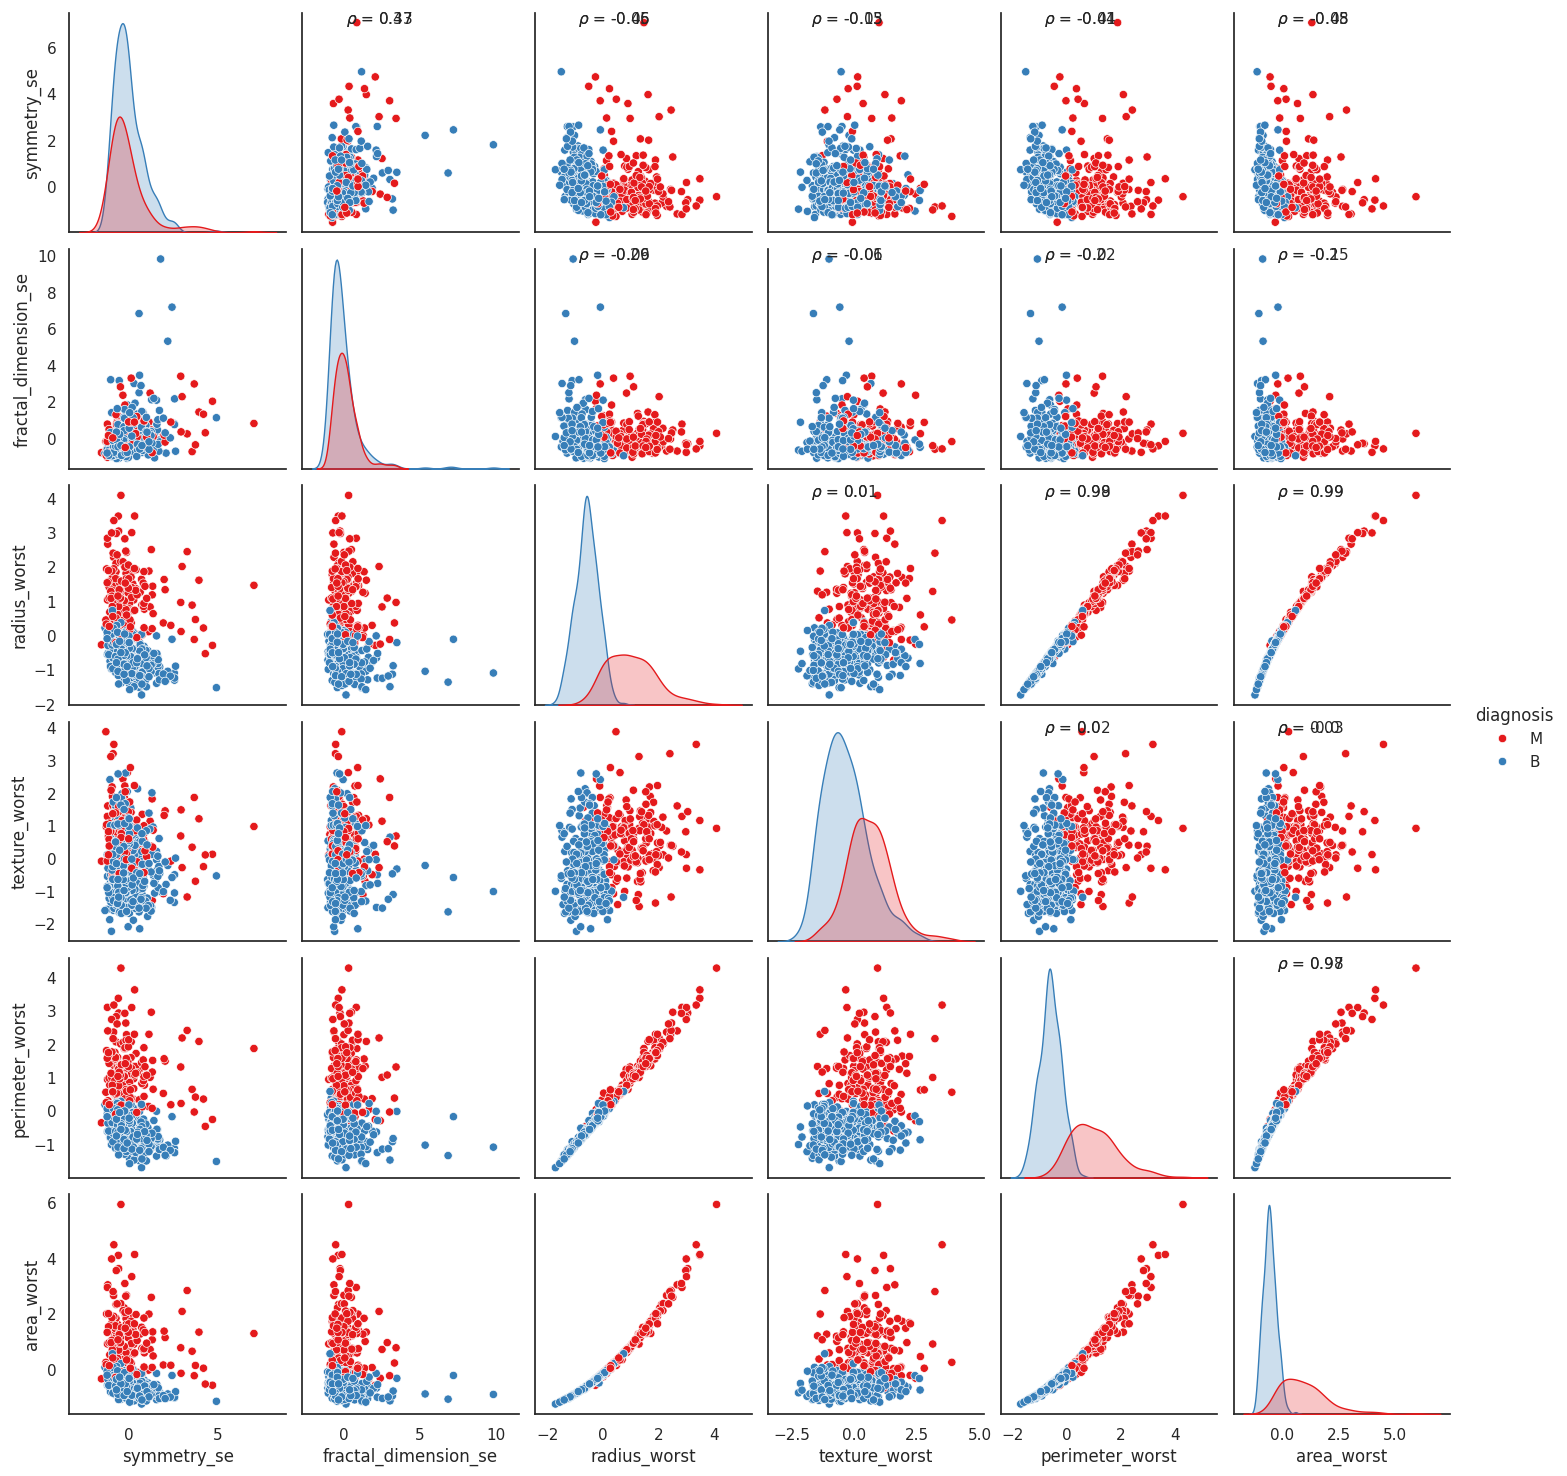

In [30]:
# Next six features
data = pd.concat([y,data_n_2.iloc[:,18:24]],axis=1)
plt.figure(figsize=(10,10))
grid=sns.pairplot(data=data,kind ="scatter",hue="diagnosis",palette="Set1")
grid = grid.map_upper(corr)

<b>Pairplot for next six features (24-30).</b>

<Figure size 1000x1000 with 0 Axes>

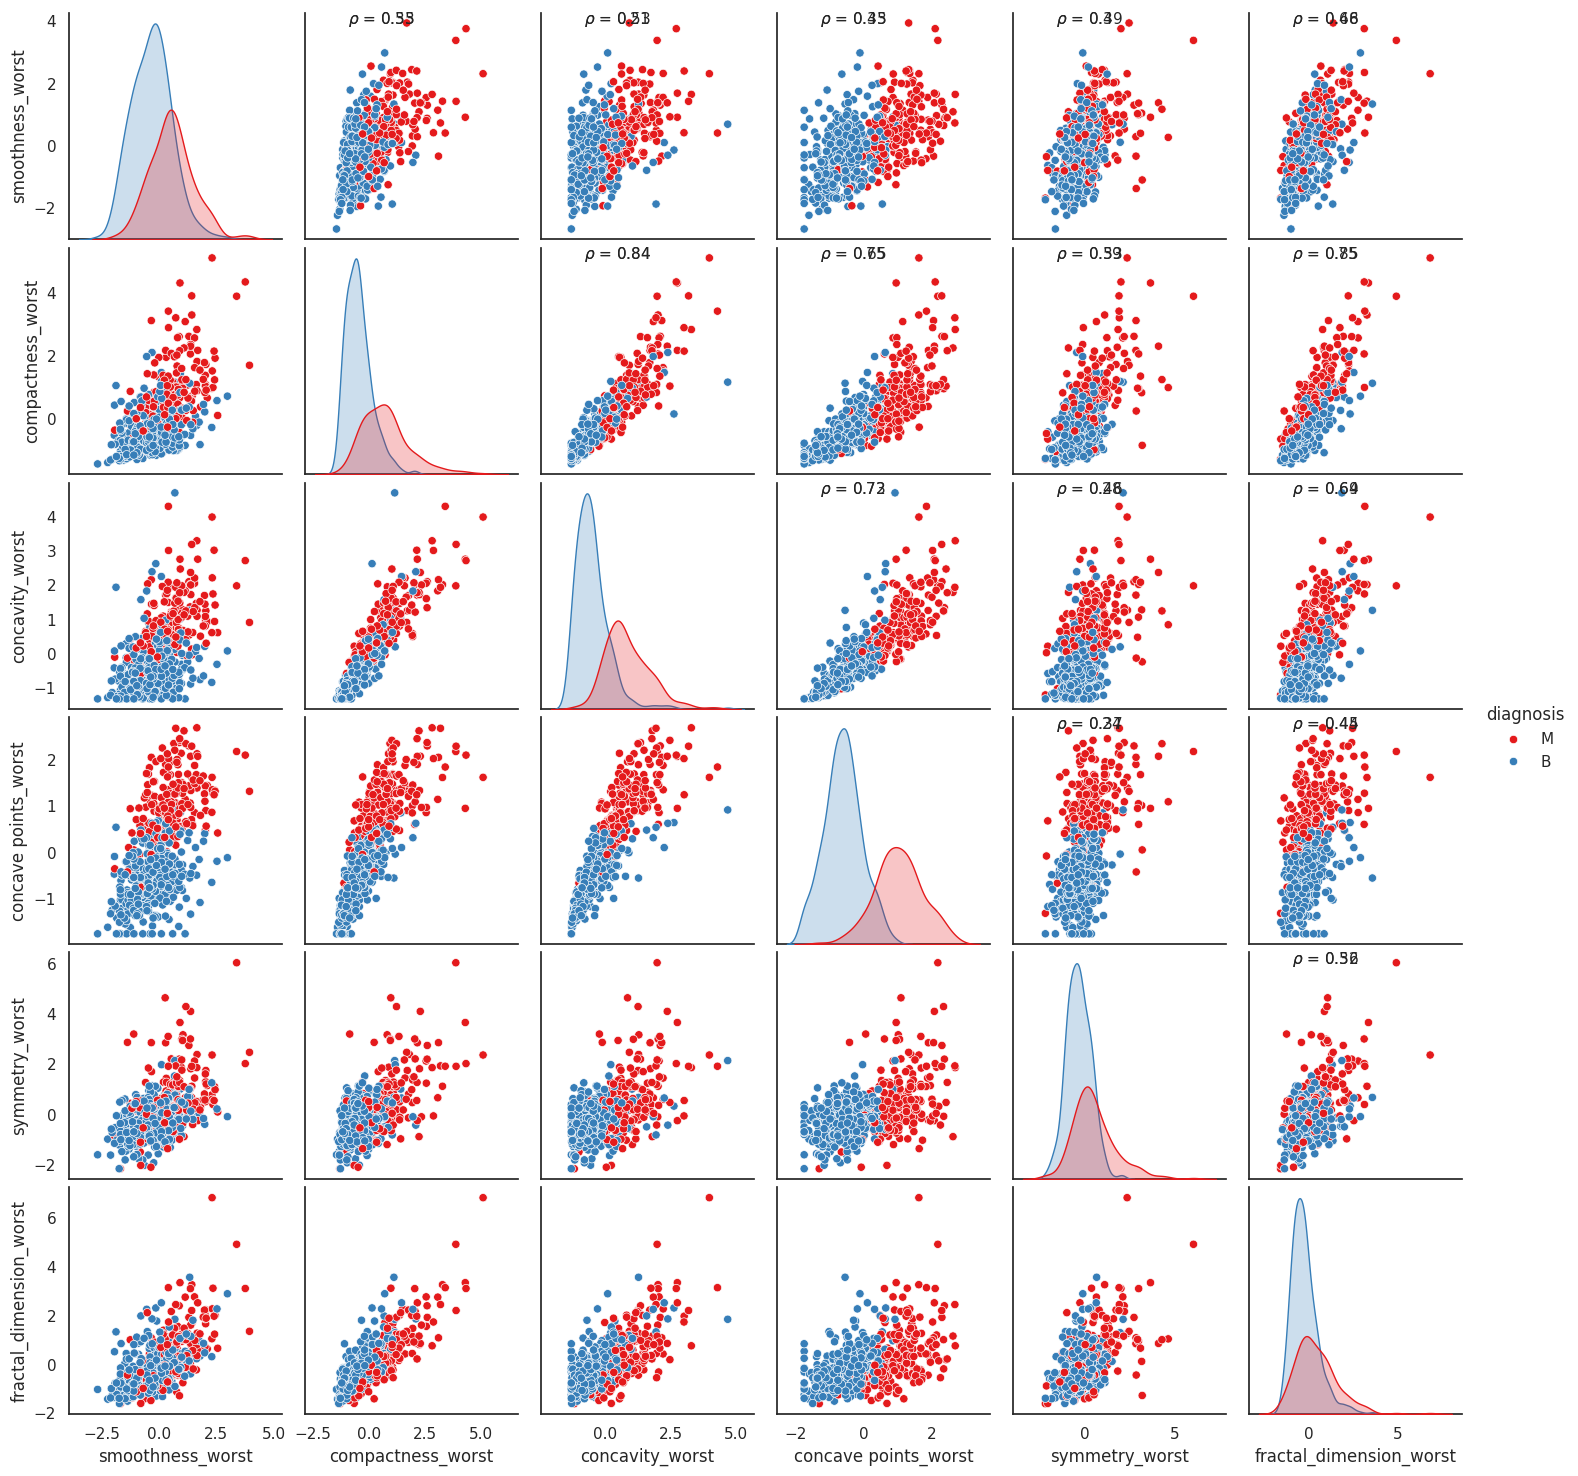

In [31]:
# Next six features
data = pd.concat([y,data_n_2.iloc[:,24:30]],axis=1)
plt.figure(figsize=(10,10))
grid=sns.pairplot(data=data,kind ="scatter",hue="diagnosis",palette="Set1")
grid = grid.map_upper(corr)

#### 1.3.4.3 Check heatmap of continuous features<a class="anchor" id="heatmap"></a>
[Back to Table of Contents](#bcImp)

A heatmap (or heat map) is a graphical representation of data where values are depicted by color. Here we will generate the heatmap of correlation matrix of continuous features.

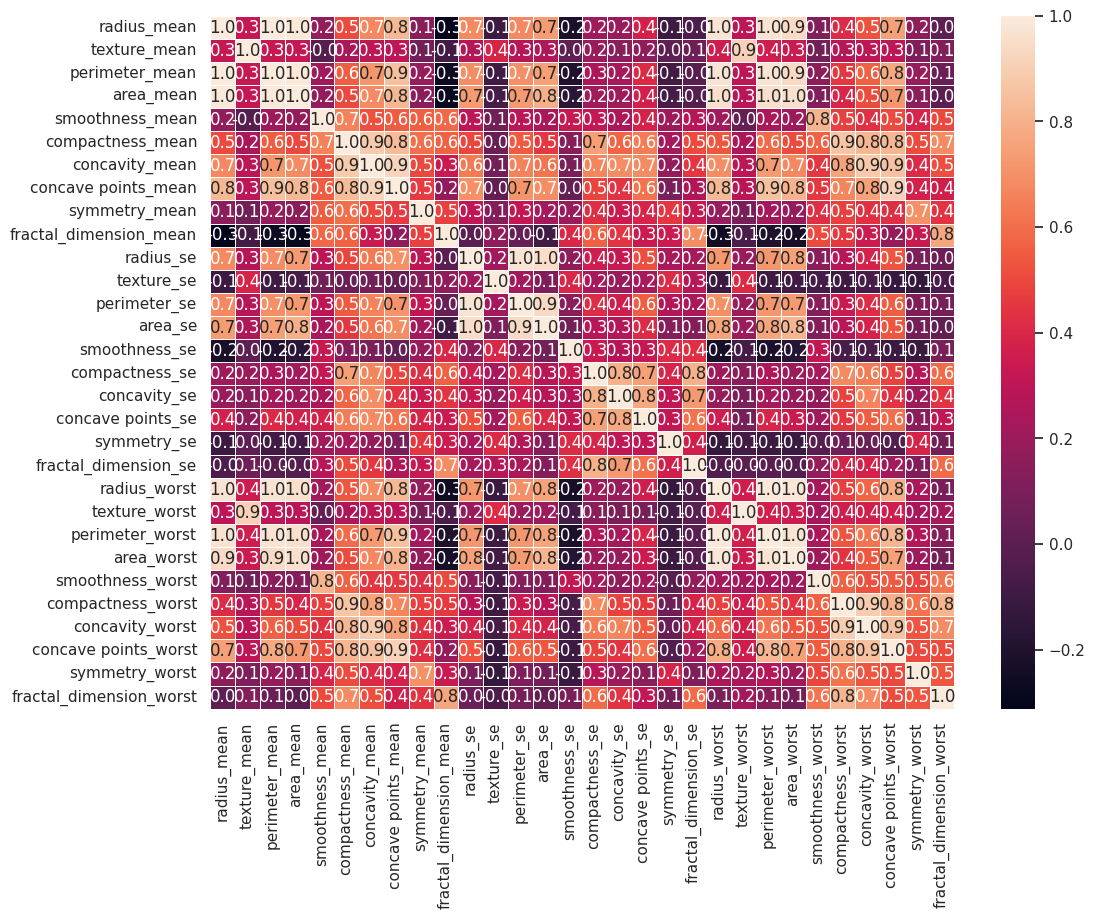

In [32]:
#correlation matrix
corrmat = X.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True, linewidths=.5, fmt= '.1f',ax=ax);

As it can be seen in heat map plot <b>radius_mean, perimeter_mean and area_mean</b> are highly correlated with each other so we can use one of them. If you ask how we choose one as a feature to use, well actually there is no correct answer.

Compactness_mean, concavity_mean and concave points_mean are correlated with each other. Therefore we can choose one of them. Apart from these, radius_se, perimeter_se and area_se are correlated and we can use one of them. radius_worst, perimeter_worst and area_worst are correlated so we can use one of them. Compactness_worst, concavity_worst and concave points_worst so we can use one of them. Compactness_se, concavity_se and concave points_se so we can use one them. texture_mean and texture_worst are correlated and we can use one of them. area_worst and area_mean are correlated, we can use one of them.

<b>Lets drop correlated variables and check again heat map.</b>

In [33]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1 = X.drop(drop_list1,axis = 1 )

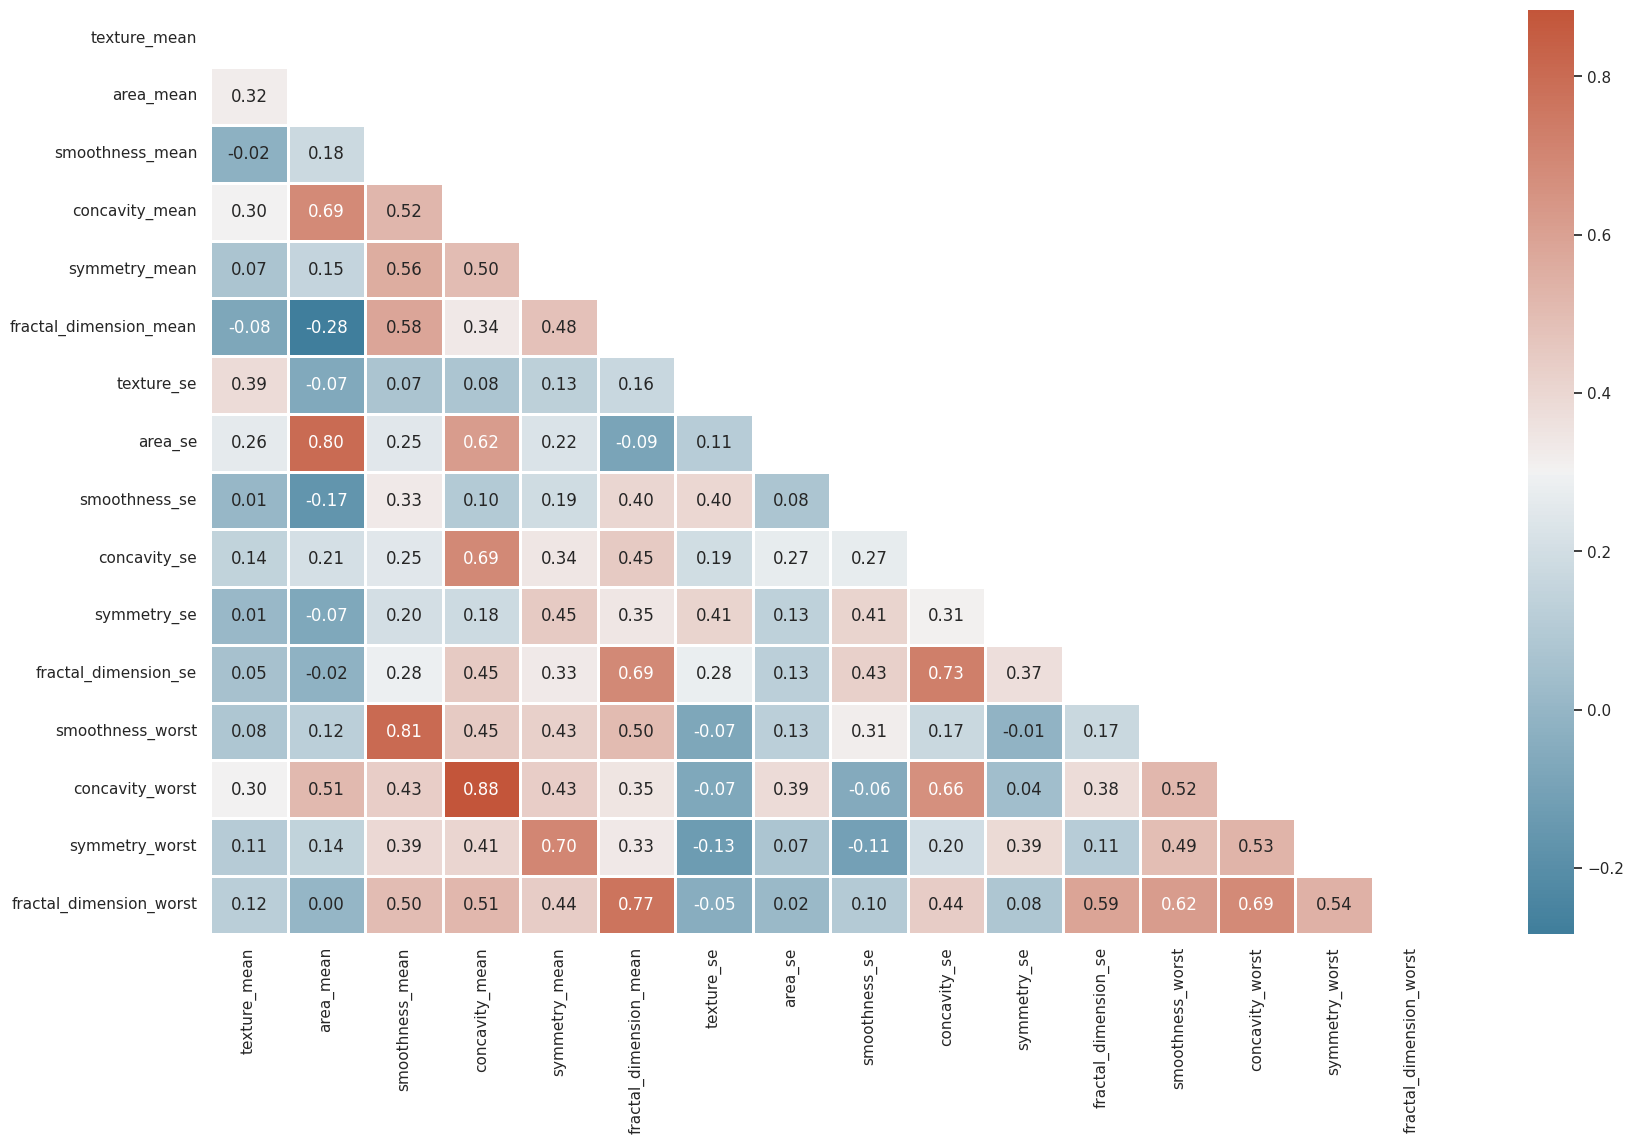

In [34]:
plt.figure(figsize = (20, 12))
corr = x_1.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask = mask, linewidths = 1, cmap=cmap, annot = True, fmt = ".2f")
plt.show()

<Axes: >

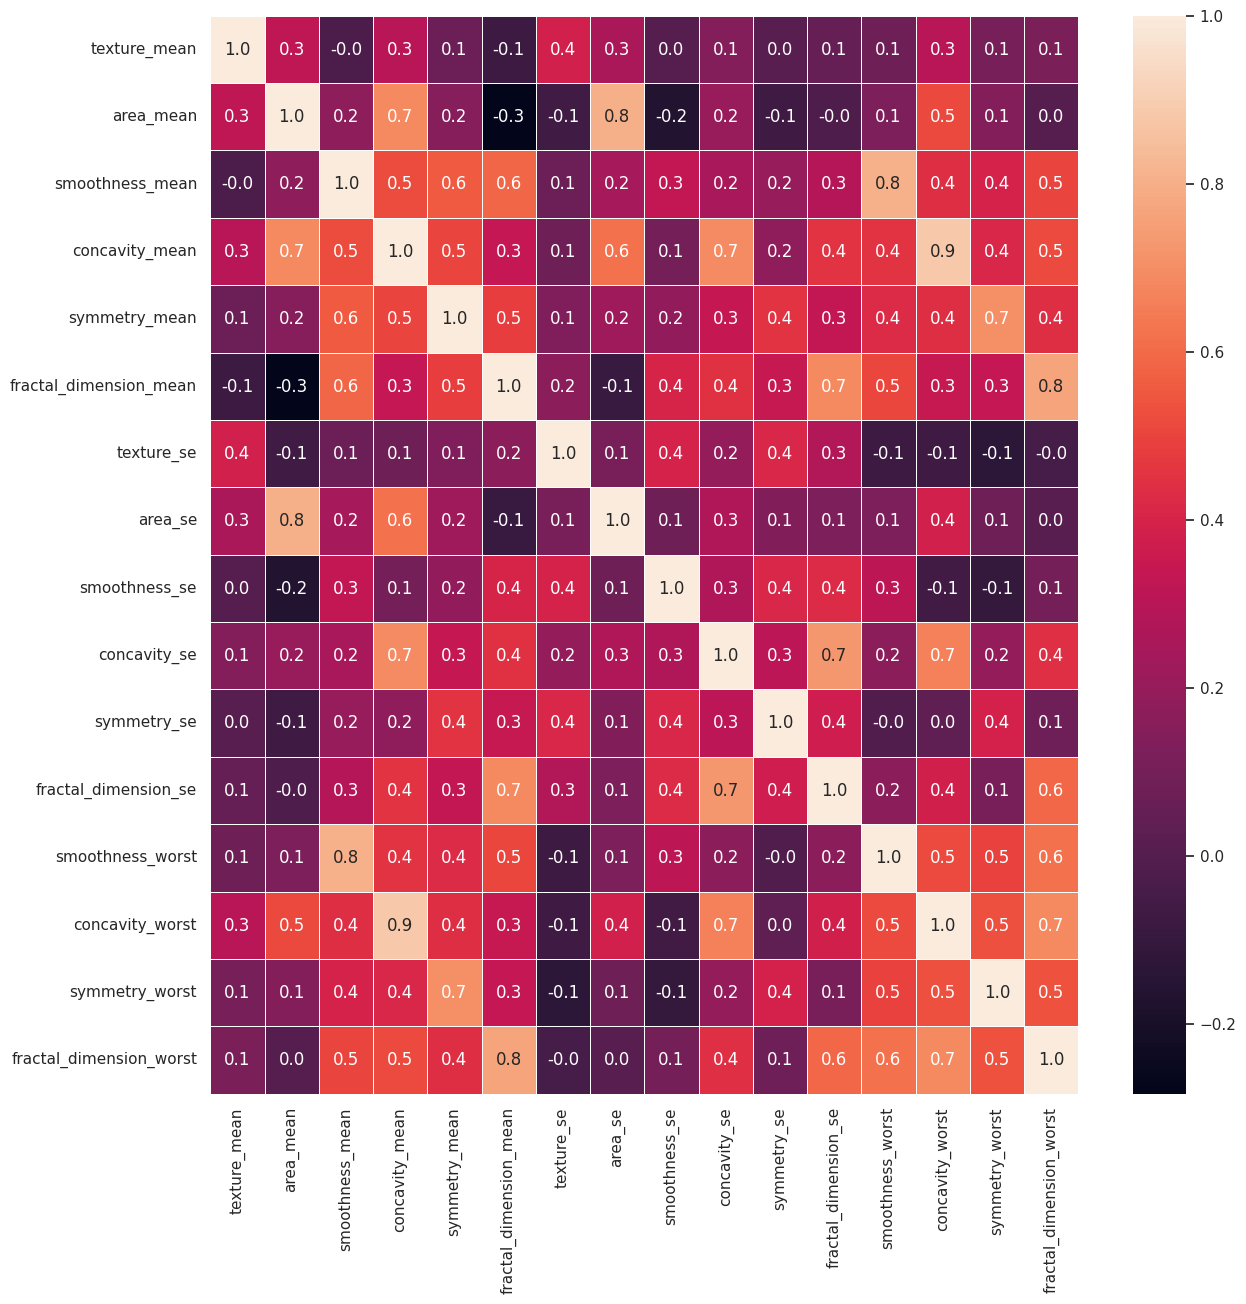

In [35]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

After drop correlated features, as it can be seen in above correlation matrix, there is only one high correlation value 0.9 between concavity_mean and concavity_worst. We will check model performance based on these features in Part 2.

# Outlier Detection

<Axes: >

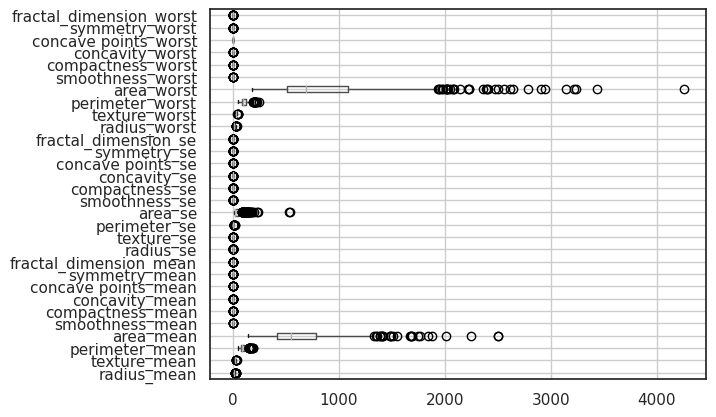

In [36]:
X.boxplot(vert = 0)

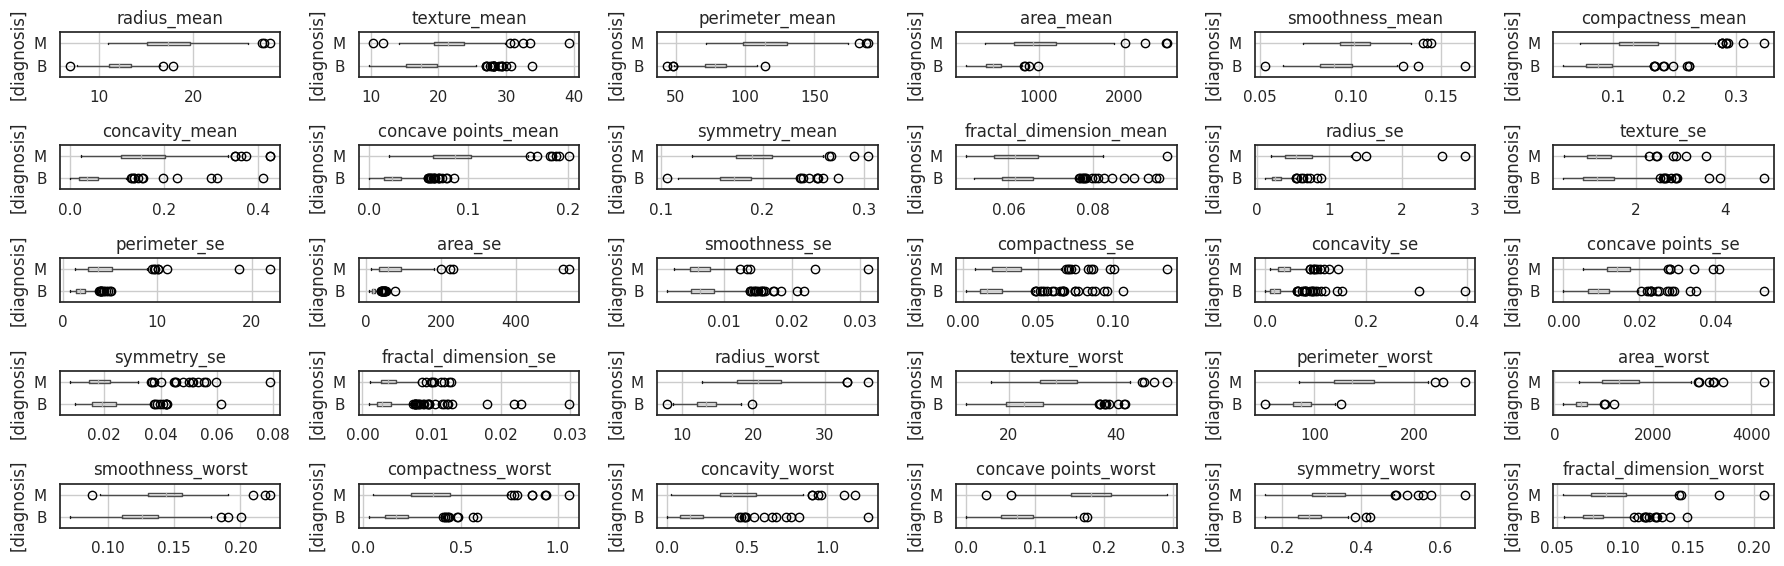

In [38]:
# Load the data (replace with your own data)
data = pd.read_csv('/content/drive/MyDrive/Secure-Model-Optimization/DATASETS/Breast_Cancer_Wisconsin_Data.csv')
fig, axes = plt.subplots(5, 6, figsize=(18, 6))
for c, ax in zip(X.columns, axes.ravel()):
    data[[c, 'diagnosis']].boxplot(vert=False, by='diagnosis', ax=ax)
    ax.set_xlabel("")
plt.suptitle("")
plt.tight_layout()

##  In summary <a class="anchor" id = "relationshipSummary"></a>
[Back to Table of Contents](#bcImp)

We can conclude that:
* Joint plot, pair plot, and heatmap can be used to see the correlation between variables.
* There are <b>high correlation variables in the dataset.

Well, <b>Part 1</b> ends here. In this article, we did a pretty good analysis of Breast Cancer Wisconsin Dataset. We understood how to explore data and note the key things before data preparation.

In <b>part 2</b>, we are going to focus on <b>Feature Selection, Modeling and Evaluation</b>.

# Normal Splitting

## Training 75% and Testing 25% of the Dataset

In [39]:
from sklearn.model_selection import train_test_split
test_size=0.25
test=test_size*100
train=100-test
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, stratify=y)
algorithm=[]
algorithm_training_accuracy=[]
def models(X_train,Y_train):

  # Random Forest
  from sklearn.ensemble import RandomForestClassifier
  forest  = RandomForestClassifier(n_estimators=10,criterion = 'entropy', random_state=0)
  forest.fit(X_train,Y_train)
  algorithm.append('Random Forest')
  algorithm_training_accuracy.append(forest.score(X_train,Y_train))

  # Gaussian Naive Bayes
  from sklearn.naive_bayes import GaussianNB
  Gau = GaussianNB()
  Gau.fit(X_train,Y_train)
  algorithm.append('Gaussian Naive Bayes')
  algorithm_training_accuracy.append(Gau.score(X_train,Y_train))

  # Bagging
  from sklearn.ensemble import BaggingClassifier
  bgg = BaggingClassifier()
  bgg.fit(X_train,Y_train)
  algorithm.append('Bagging')
  algorithm_training_accuracy.append(bgg.score(X_train,Y_train))

   #Gradient boost
  from sklearn.ensemble import GradientBoostingClassifier
  grd = GradientBoostingClassifier()
  grd.fit(X_train, Y_train)
  algorithm.append('Gradient boost')
  algorithm_training_accuracy.append(grd.score(X_train,Y_train))

    #Print the  model accuracy on the training data
  #Print the  model accuracy on the training data
  print("[0] Random Forest Training Accuracy :", forest.score(X_train,Y_train))
  print("[1] Gaussian Naive Bayes Training Accuracy :", Gau.score(X_train,Y_train))
  print("[2] Bagging Training Accuracy :", bgg.score(X_train,Y_train))
  print("[3] Gradient Training Accuracy :", grd.score(X_train,Y_train))
  return forest, Gau, bgg, grd
model = models(X_train,Y_train)
print(model)
algorithm=[]
algorithm_testing_accuracy=[]
from math import sqrt
from sklearn.metrics import confusion_matrix
def calculate_metrics(TP, TN, FP, FN):
    PPV = (TP)/(TP+FP)                  # Precision or Positive_Predictive_Value (PPV)
    Recall = TP/(TP+FN)                # Recall or Sensitivity or True_Positive_Rate (TPR) or Hit_Rate
    F1_S = (2*PPV*Recall)/(PPV+Recall) # F1 Score or Harmonic Mean
    F1_M = (PPV+Recall)/2              # F1 Measure
    Specificity = TN/(TN+FP)           # Specificity or True_Negative_Rate(TNR) or Selectivity
    NPV = TN/(TN+FN)                   # Negative_Predictive_Value
    FPR = FP/(FP+TN)                   # False_Positive_Rate
    FNR = FN/(TP+FN)                   # False_Negative_Rate or Miss_Rate
    FDR = FP/(TP+FP)                   # False_Discovery_Rate
    CSI = TP/(TP+FN+FP)                # Critical_Success_Index or Threat_Score(TS)
    FM = sqrt(PPV*Recall)              # Fowlkes_Mallows_Index
    BA = (Recall+Specificity)/2        # Balanced_Accuracy
    MCC = (TP*TN-FP*FN)/(sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))) # Mathews_Correlation_Coefficient
    BI = Recall+Specificity-1 # Bookmaker_Informedness or Informedness
    MK = PPV+NPV-1                     # Markedness or delta
    FOR = FN/(FN+TN)                   # False_Omission_Rate
    PLR = Recall/FPR                   # Positive_Likelihood_Ratio
    NLR = FNR/Specificity              # Negative_Likelihood_Ratio
    PT = sqrt(FPR)/(sqrt(Recall)+sqrt(FPR)) # Prevalence_Threshold
    DOR = PLR/NLR                      # Diagnostic_Odds_Ratio
    accuracy = (TP + TN) / (TP + TN + FP + FN)    # Overall accuracy, not for each class
    p0 = (TP + TN) / (TP + TN + FP + FN)         # Observed agreement
    pe = ((TP+FP)*(TP+FN) + (TN+FP)*(TN+FN)) / ((TP+TN+FP+FN)**2)   # Chance agreement
    kappa = (p0 - pe) / (1 - pe)          # Cohen Kappa score, overall

    return {'PPV': PPV, 'Recall': Recall, 'F1_Score': F1_S, 'F1_Measure': F1_M, 'Specificity': Specificity,
            'NPV': NPV, 'FPR': FPR, 'FNR': FNR, 'FDR': FDR, 'CSI': CSI, 'FM': FM, 'BA': BA, 'MCC': MCC,
            'BI': BI, 'MK': MK, 'FOR': FOR, 'PLR': PLR, 'NLR': NLR, 'PT': PT, 'DOR': DOR,
            'Accuracy': accuracy, 'Cohen_Kappa': kappa}
df = pd.DataFrame(columns=['Algorithm','Percentage','PPV', 'Recall', 'F1_Score', 'F1_Measure', 'Specificity',
            'NPV', 'FPR', 'FNR', 'FDR', 'CSI', 'FM', 'BA', 'MCC',
            'BI', 'MK', 'FOR', 'PLR', 'NLR', 'PT', 'DOR',
            'Accuracy', 'Cohen_Kappa'])
from numpy import sqrt
from sklearn.metrics import matthews_corrcoef
n_classes=2
for i in range(len(model)):
  cm = confusion_matrix(Y_test,model[i].predict(X_test))
  # Calculating the TP,FP,FN,TN values
  for c in range(n_classes):
    TP = cm[c,c]
    FP = sum(cm[:,c]) - cm[c,c]
    FN = sum(cm[c,:]) - cm[c,c]
    TN = sum(np.delete(sum(cm)-cm[c,:],c))
    cm = confusion_matrix(Y_test,model[i].predict(X_test))
from numpy import sqrt
from sklearn.metrics import matthews_corrcoef
n_classes=2
for i in range(len(model)):
  cm = confusion_matrix(Y_test,model[i].predict(X_test))
  # Calculating the TP,FP,FN,TN values
  for c in range(n_classes):
    TP = cm[c,c]
    FP = sum(cm[:,c]) - cm[c,c]
    FN = sum(cm[c,:]) - cm[c,c]
    TN = sum(np.delete(sum(cm)-cm[c,:],c))
    cm = confusion_matrix(Y_test,model[i].predict(X_test))

  if i==0:
    calculate_metrics(TP, TN, FP, FN)
    metrics = calculate_metrics(TP, TN, FP, FN)
    metrics['Algorithm'] = 'Random Forest'
    metrics['Percentage'] = 'Train:'+str(train)+" "+'Test:'+str(test)
    df.loc[len(df)] = metrics
    print("--------DT---------")
    df1 = pd.DataFrame(metrics, index=[0])
    print(df1)
  elif i==1:
    calculate_metrics(TP, TN, FP, FN)
    metrics = calculate_metrics(TP, TN, FP, FN)
    metrics['Algorithm'] = 'Gaussian Naive Bayes'
    metrics['Percentage'] = 'Train:'+str(train)+" "+'Test:'+str(test)
    df.loc[len(df)] = metrics
    print("--------LDA---------")
    df2 = pd.DataFrame(metrics, index=[0])
    print(df2)
  elif i==2:
    calculate_metrics(TP, TN, FP, FN)
    metrics = calculate_metrics(TP, TN, FP, FN)
    metrics['Algorithm'] = 'Bagging'
    metrics['Percentage'] = 'Train:'+str(train)+" "+'Test:'+str(test)
    df.loc[len(df)] = metrics
    print("--------ETC---------")
    df3 = pd.DataFrame(metrics, index=[0])
    print(df3)
  elif i==3:
    calculate_metrics(TP, TN, FP, FN)
    metrics = calculate_metrics(TP, TN, FP, FN)
    metrics['Algorithm'] = 'Gradient Boost'
    metrics['Percentage'] = 'Train:'+str(train)+" "+'Test:'+str(test)
    df.loc[len(df)] = metrics
    print("--------DT---------")
    df4 = pd.DataFrame(metrics, index=[0])
    print(df4)
final_df = pd.concat([df1, df2, df3, df4], axis=0)
final_df.to_csv("Normal_Splitting_Train_75_Test_25.csv")

[0] Random Forest Training Accuracy : 1.0
[1] Gaussian Naive Bayes Training Accuracy : 0.9460093896713615
[2] Bagging Training Accuracy : 0.9976525821596244
[3] Gradient Training Accuracy : 1.0
(RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0), GaussianNB(), BaggingClassifier(), GradientBoostingClassifier())
--------DT---------
        PPV    Recall  F1_Score  F1_Measure  Specificity       NPV       FPR  \
0  0.979167  0.886792  0.930693     0.93298     0.988889  0.936842  0.011111   

        FNR       FDR      CSI  ...        MK       FOR        PLR      NLR  \
0  0.113208  0.020833  0.87037  ...  0.916009  0.063158  79.811321  0.11448   

         PT         DOR  Accuracy  Cohen_Kappa      Algorithm  \
0  0.100667  697.166667  0.951049     0.892998  Random Forest   

             Percentage  
0  Train:75.0 Test:25.0  

[1 rows x 24 columns]
--------LDA---------
        PPV    Recall  F1_Score  F1_Measure  Specificity       NPV       FPR  \
0  0.958333  0.

## Training 80% and Testing 20% of the Dataset

In [40]:
from sklearn.model_selection import train_test_split
test_size=0.20
test=test_size*100
train=100-test
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, stratify=y)
algorithm=[]
algorithm_training_accuracy=[]
def models(X_train,Y_train):

  # Random Forest
  from sklearn.ensemble import RandomForestClassifier
  forest  = RandomForestClassifier(n_estimators=10,criterion = 'entropy', random_state=0)
  forest.fit(X_train,Y_train)
  algorithm.append('Random Forest')
  algorithm_training_accuracy.append(forest.score(X_train,Y_train))

  # Gaussian Naive Bayes
  from sklearn.naive_bayes import GaussianNB
  Gau = GaussianNB()
  Gau.fit(X_train,Y_train)
  algorithm.append('Gaussian Naive Bayes')
  algorithm_training_accuracy.append(Gau.score(X_train,Y_train))

  # Bagging
  from sklearn.ensemble import BaggingClassifier
  bgg = BaggingClassifier()
  bgg.fit(X_train,Y_train)
  algorithm.append('Bagging')
  algorithm_training_accuracy.append(bgg.score(X_train,Y_train))

   #Gradient boost
  from sklearn.ensemble import GradientBoostingClassifier
  grd = GradientBoostingClassifier()
  grd.fit(X_train, Y_train)
  algorithm.append('Gradient boost')
  algorithm_training_accuracy.append(grd.score(X_train,Y_train))

    #Print the  model accuracy on the training data
  #Print the  model accuracy on the training data
  print("[0] Random Forest Training Accuracy :", forest.score(X_train,Y_train))
  print("[1] Gaussian Naive Bayes Training Accuracy :", Gau.score(X_train,Y_train))
  print("[2] Bagging Training Accuracy :", bgg.score(X_train,Y_train))
  print("[3] Gradient Training Accuracy :", grd.score(X_train,Y_train))
  return forest, Gau, bgg, grd
model = models(X_train,Y_train)
print(model)
algorithm=[]
algorithm_testing_accuracy=[]
from math import sqrt
from sklearn.metrics import confusion_matrix
def calculate_metrics(TP, TN, FP, FN):
    PPV = (TP)/(TP+FP)                  # Precision or Positive_Predictive_Value (PPV)
    Recall = TP/(TP+FN)                # Recall or Sensitivity or True_Positive_Rate (TPR) or Hit_Rate
    F1_S = (2*PPV*Recall)/(PPV+Recall) # F1 Score or Harmonic Mean
    F1_M = (PPV+Recall)/2              # F1 Measure
    Specificity = TN/(TN+FP)           # Specificity or True_Negative_Rate(TNR) or Selectivity
    NPV = TN/(TN+FN)                   # Negative_Predictive_Value
    FPR = FP/(FP+TN)                   # False_Positive_Rate
    FNR = FN/(TP+FN)                   # False_Negative_Rate or Miss_Rate
    FDR = FP/(TP+FP)                   # False_Discovery_Rate
    CSI = TP/(TP+FN+FP)                # Critical_Success_Index or Threat_Score(TS)
    FM = sqrt(PPV*Recall)              # Fowlkes_Mallows_Index
    BA = (Recall+Specificity)/2        # Balanced_Accuracy
    MCC = (TP*TN-FP*FN)/(sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))) # Mathews_Correlation_Coefficient
    BI = Recall+Specificity-1 # Bookmaker_Informedness or Informedness
    MK = PPV+NPV-1                     # Markedness or delta
    FOR = FN/(FN+TN)                   # False_Omission_Rate
    PLR = Recall/FPR                   # Positive_Likelihood_Ratio
    NLR = FNR/Specificity              # Negative_Likelihood_Ratio
    PT = sqrt(FPR)/(sqrt(Recall)+sqrt(FPR)) # Prevalence_Threshold
    DOR = PLR/NLR                      # Diagnostic_Odds_Ratio
    accuracy = (TP + TN) / (TP + TN + FP + FN)    # Overall accuracy, not for each class
    p0 = (TP + TN) / (TP + TN + FP + FN)         # Observed agreement
    pe = ((TP+FP)*(TP+FN) + (TN+FP)*(TN+FN)) / ((TP+TN+FP+FN)**2)   # Chance agreement
    kappa = (p0 - pe) / (1 - pe)          # Cohen Kappa score, overall

    return {'PPV': PPV, 'Recall': Recall, 'F1_Score': F1_S, 'F1_Measure': F1_M, 'Specificity': Specificity,
            'NPV': NPV, 'FPR': FPR, 'FNR': FNR, 'FDR': FDR, 'CSI': CSI, 'FM': FM, 'BA': BA, 'MCC': MCC,
            'BI': BI, 'MK': MK, 'FOR': FOR, 'PLR': PLR, 'NLR': NLR, 'PT': PT, 'DOR': DOR,
            'Accuracy': accuracy, 'Cohen_Kappa': kappa}
df = pd.DataFrame(columns=['Algorithm','Percentage','PPV', 'Recall', 'F1_Score', 'F1_Measure', 'Specificity',
            'NPV', 'FPR', 'FNR', 'FDR', 'CSI', 'FM', 'BA', 'MCC',
            'BI', 'MK', 'FOR', 'PLR', 'NLR', 'PT', 'DOR',
            'Accuracy', 'Cohen_Kappa'])
from numpy import sqrt
from sklearn.metrics import matthews_corrcoef
n_classes=2
for i in range(len(model)):
  cm = confusion_matrix(Y_test,model[i].predict(X_test))
  # Calculating the TP,FP,FN,TN values
  for c in range(n_classes):
    TP = cm[c,c]
    FP = sum(cm[:,c]) - cm[c,c]
    FN = sum(cm[c,:]) - cm[c,c]
    TN = sum(np.delete(sum(cm)-cm[c,:],c))
    cm = confusion_matrix(Y_test,model[i].predict(X_test))
from numpy import sqrt
from sklearn.metrics import matthews_corrcoef
n_classes=2
for i in range(len(model)):
  cm = confusion_matrix(Y_test,model[i].predict(X_test))
  # Calculating the TP,FP,FN,TN values
  for c in range(n_classes):
    TP = cm[c,c]
    FP = sum(cm[:,c]) - cm[c,c]
    FN = sum(cm[c,:]) - cm[c,c]
    TN = sum(np.delete(sum(cm)-cm[c,:],c))
    cm = confusion_matrix(Y_test,model[i].predict(X_test))

  if i==0:
    calculate_metrics(TP, TN, FP, FN)
    metrics = calculate_metrics(TP, TN, FP, FN)
    metrics['Algorithm'] = 'Random Forest'
    metrics['Percentage'] = 'Train:'+str(train)+" "+'Test:'+str(test)
    df.loc[len(df)] = metrics
    print("--------DT---------")
    df1 = pd.DataFrame(metrics, index=[0])
    print(df1)
  elif i==1:
    calculate_metrics(TP, TN, FP, FN)
    metrics = calculate_metrics(TP, TN, FP, FN)
    metrics['Algorithm'] = 'Gaussian Naive Bayes'
    metrics['Percentage'] = 'Train:'+str(train)+" "+'Test:'+str(test)
    df.loc[len(df)] = metrics
    print("--------LDA---------")
    df2 = pd.DataFrame(metrics, index=[0])
    print(df2)
  elif i==2:
    calculate_metrics(TP, TN, FP, FN)
    metrics = calculate_metrics(TP, TN, FP, FN)
    metrics['Algorithm'] = 'Bagging'
    metrics['Percentage'] = 'Train:'+str(train)+" "+'Test:'+str(test)
    df.loc[len(df)] = metrics
    print("--------ETC---------")
    df3 = pd.DataFrame(metrics, index=[0])
    print(df3)
  elif i==3:
    calculate_metrics(TP, TN, FP, FN)
    metrics = calculate_metrics(TP, TN, FP, FN)
    metrics['Algorithm'] = 'Gradient Boost'
    metrics['Percentage'] = 'Train:'+str(train)+" "+'Test:'+str(test)
    df.loc[len(df)] = metrics
    print("--------DT---------")
    df4 = pd.DataFrame(metrics, index=[0])
    print(df4)
final_df = pd.concat([df1, df2, df3, df4], axis=0)
final_df.to_csv("Normal_Splitting_Train_80_Test_20.csv")

[0] Random Forest Training Accuracy : 0.9934065934065934
[1] Gaussian Naive Bayes Training Accuracy : 0.9472527472527472
[2] Bagging Training Accuracy : 0.9956043956043956
[3] Gradient Training Accuracy : 1.0
(RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0), GaussianNB(), BaggingClassifier(), GradientBoostingClassifier())
--------DT---------
    PPV    Recall  F1_Score  F1_Measure  Specificity       NPV       FPR  \
0  0.95  0.904762  0.926829    0.927381     0.972222  0.945946  0.027778   

        FNR   FDR       CSI  ...        MK       FOR        PLR       NLR  \
0  0.095238  0.05  0.863636  ...  0.895946  0.054054  32.571429  0.097959   

         PT    DOR  Accuracy  Cohen_Kappa      Algorithm            Percentage  
0  0.149095  332.5  0.947368     0.885772  Random Forest  Train:80.0 Test:20.0  

[1 rows x 24 columns]
--------LDA---------
        PPV    Recall  F1_Score  F1_Measure  Specificity       NPV       FPR  \
0  0.971429  0.809524  0.883117  

## Training 90% and Testing 10% of the Dataset

In [41]:
from sklearn.model_selection import train_test_split
test_size=0.10
test=test_size*100
train=100-test
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, stratify=y)
algorithm=[]
algorithm_training_accuracy=[]
def models(X_train,Y_train):

  # Random Forest
  from sklearn.ensemble import RandomForestClassifier
  forest  = RandomForestClassifier(n_estimators=10,criterion = 'entropy', random_state=0)
  forest.fit(X_train,Y_train)
  algorithm.append('Random Forest')
  algorithm_training_accuracy.append(forest.score(X_train,Y_train))

  # Gaussian Naive Bayes
  from sklearn.naive_bayes import GaussianNB
  Gau = GaussianNB()
  Gau.fit(X_train,Y_train)
  algorithm.append('Gaussian Naive Bayes')
  algorithm_training_accuracy.append(Gau.score(X_train,Y_train))

  # Bagging
  from sklearn.ensemble import BaggingClassifier
  bgg = BaggingClassifier()
  bgg.fit(X_train,Y_train)
  algorithm.append('Bagging')
  algorithm_training_accuracy.append(bgg.score(X_train,Y_train))

   #Gradient boost
  from sklearn.ensemble import GradientBoostingClassifier
  grd = GradientBoostingClassifier()
  grd.fit(X_train, Y_train)
  algorithm.append('Gradient boost')
  algorithm_training_accuracy.append(grd.score(X_train,Y_train))

    #Print the  model accuracy on the training data
  #Print the  model accuracy on the training data
  print("[0] Random Forest Training Accuracy :", forest.score(X_train,Y_train))
  print("[1] Gaussian Naive Bayes Training Accuracy :", Gau.score(X_train,Y_train))
  print("[2] Bagging Training Accuracy :", bgg.score(X_train,Y_train))
  print("[3] Gradient Training Accuracy :", grd.score(X_train,Y_train))
  return forest, Gau, bgg, grd
model = models(X_train,Y_train)
print(model)
algorithm=[]
algorithm_testing_accuracy=[]
from math import sqrt
from sklearn.metrics import confusion_matrix
def calculate_metrics(TP, TN, FP, FN):
    PPV = (TP)/(TP+FP)                  # Precision or Positive_Predictive_Value (PPV)
    Recall = TP/(TP+FN)                # Recall or Sensitivity or True_Positive_Rate (TPR) or Hit_Rate
    F1_S = (2*PPV*Recall)/(PPV+Recall) # F1 Score or Harmonic Mean
    F1_M = (PPV+Recall)/2              # F1 Measure
    Specificity = TN/(TN+FP)           # Specificity or True_Negative_Rate(TNR) or Selectivity
    NPV = TN/(TN+FN)                   # Negative_Predictive_Value
    FPR = FP/(FP+TN)                   # False_Positive_Rate
    FNR = FN/(TP+FN)                   # False_Negative_Rate or Miss_Rate
    FDR = FP/(TP+FP)                   # False_Discovery_Rate
    CSI = TP/(TP+FN+FP)                # Critical_Success_Index or Threat_Score(TS)
    FM = sqrt(PPV*Recall)              # Fowlkes_Mallows_Index
    BA = (Recall+Specificity)/2        # Balanced_Accuracy
    MCC = (TP*TN-FP*FN)/(sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))) # Mathews_Correlation_Coefficient
    BI = Recall+Specificity-1 # Bookmaker_Informedness or Informedness
    MK = PPV+NPV-1                     # Markedness or delta
    FOR = FN/(FN+TN)                   # False_Omission_Rate
    PLR = Recall/FPR                   # Positive_Likelihood_Ratio
    NLR = FNR/Specificity              # Negative_Likelihood_Ratio
    PT = sqrt(FPR)/(sqrt(Recall)+sqrt(FPR)) # Prevalence_Threshold
    DOR = PLR/NLR                      # Diagnostic_Odds_Ratio
    accuracy = (TP + TN) / (TP + TN + FP + FN)    # Overall accuracy, not for each class
    p0 = (TP + TN) / (TP + TN + FP + FN)         # Observed agreement
    pe = ((TP+FP)*(TP+FN) + (TN+FP)*(TN+FN)) / ((TP+TN+FP+FN)**2)   # Chance agreement
    kappa = (p0 - pe) / (1 - pe)          # Cohen Kappa score, overall

    return {'PPV': PPV, 'Recall': Recall, 'F1_Score': F1_S, 'F1_Measure': F1_M, 'Specificity': Specificity,
            'NPV': NPV, 'FPR': FPR, 'FNR': FNR, 'FDR': FDR, 'CSI': CSI, 'FM': FM, 'BA': BA, 'MCC': MCC,
            'BI': BI, 'MK': MK, 'FOR': FOR, 'PLR': PLR, 'NLR': NLR, 'PT': PT, 'DOR': DOR,
            'Accuracy': accuracy, 'Cohen_Kappa': kappa}
df = pd.DataFrame(columns=['Algorithm','Percentage','PPV', 'Recall', 'F1_Score', 'F1_Measure', 'Specificity',
            'NPV', 'FPR', 'FNR', 'FDR', 'CSI', 'FM', 'BA', 'MCC',
            'BI', 'MK', 'FOR', 'PLR', 'NLR', 'PT', 'DOR',
            'Accuracy', 'Cohen_Kappa'])
from numpy import sqrt
from sklearn.metrics import matthews_corrcoef
n_classes=2
for i in range(len(model)):
  cm = confusion_matrix(Y_test,model[i].predict(X_test))
  # Calculating the TP,FP,FN,TN values
  for c in range(n_classes):
    TP = cm[c,c]
    FP = sum(cm[:,c]) - cm[c,c]
    FN = sum(cm[c,:]) - cm[c,c]
    TN = sum(np.delete(sum(cm)-cm[c,:],c))
    cm = confusion_matrix(Y_test,model[i].predict(X_test))
from numpy import sqrt
from sklearn.metrics import matthews_corrcoef
n_classes=2
for i in range(len(model)):
  cm = confusion_matrix(Y_test,model[i].predict(X_test))
  # Calculating the TP,FP,FN,TN values
  for c in range(n_classes):
    TP = cm[c,c]
    FP = sum(cm[:,c]) - cm[c,c]
    FN = sum(cm[c,:]) - cm[c,c]
    TN = sum(np.delete(sum(cm)-cm[c,:],c))
    cm = confusion_matrix(Y_test,model[i].predict(X_test))

  if i==0:
    calculate_metrics(TP, TN, FP, FN)
    metrics = calculate_metrics(TP, TN, FP, FN)
    metrics['Algorithm'] = 'Random Forest'
    metrics['Percentage'] = 'Train:'+str(train)+" "+'Test:'+str(test)
    df.loc[len(df)] = metrics
    print("--------DT---------")
    df1 = pd.DataFrame(metrics, index=[0])
    print(df1)
  elif i==1:
    calculate_metrics(TP, TN, FP, FN)
    metrics = calculate_metrics(TP, TN, FP, FN)
    metrics['Algorithm'] = 'Gaussian Naive Bayes'
    metrics['Percentage'] = 'Train:'+str(train)+" "+'Test:'+str(test)
    df.loc[len(df)] = metrics
    print("--------LDA---------")
    df2 = pd.DataFrame(metrics, index=[0])
    print(df2)
  elif i==2:
    calculate_metrics(TP, TN, FP, FN)
    metrics = calculate_metrics(TP, TN, FP, FN)
    metrics['Algorithm'] = 'Bagging'
    metrics['Percentage'] = 'Train:'+str(train)+" "+'Test:'+str(test)
    df.loc[len(df)] = metrics
    print("--------ETC---------")
    df3 = pd.DataFrame(metrics, index=[0])
    print(df3)
  elif i==3:
    calculate_metrics(TP, TN, FP, FN)
    metrics = calculate_metrics(TP, TN, FP, FN)
    metrics['Algorithm'] = 'Gradient Boost'
    metrics['Percentage'] = 'Train:'+str(train)+" "+'Test:'+str(test)
    df.loc[len(df)] = metrics
    print("--------DT---------")
    df4 = pd.DataFrame(metrics, index=[0])
    print(df4)
final_df = pd.concat([df1, df2, df3, df4], axis=0)
final_df.to_csv("Normal_Splitting_Train_90_Test_10.csv")

[0] Random Forest Training Accuracy : 1.0
[1] Gaussian Naive Bayes Training Accuracy : 0.943359375
[2] Bagging Training Accuracy : 0.994140625
[3] Gradient Training Accuracy : 1.0
(RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0), GaussianNB(), BaggingClassifier(), GradientBoostingClassifier())
--------DT---------
        PPV    Recall  F1_Score  F1_Measure  Specificity       NPV       FPR  \
0  0.909091  0.952381  0.930233    0.930736     0.944444  0.971429  0.055556   

        FNR       FDR       CSI  ...        MK       FOR        PLR      NLR  \
0  0.047619  0.090909  0.869565  ...  0.880519  0.028571  17.142857  0.05042   

         PT    DOR  Accuracy  Cohen_Kappa      Algorithm            Percentage  
0  0.194538  340.0  0.947368     0.888016  Random Forest  Train:90.0 Test:10.0  

[1 rows x 24 columns]
--------LDA---------
        PPV    Recall  F1_Score  F1_Measure  Specificity       NPV       FPR  \
0  0.909091  0.952381  0.930233    0.930736     

# Cross-Validation with Classification Reports

## AdaBoost

        PPV    Recall  F1_Score  F1_Measure  Specificity       NPV       FPR  \
0  0.937824  0.947644  0.942708    0.942734     0.962617  0.968652  0.037383   

        FNR       FDR       CSI  ...       FOR        PLR       NLR        PT  \
0  0.052356  0.062176  0.891626  ...  0.031348  25.349476  0.054389  0.165705   

       DOR  Accuracy  Cohen_Kappa  Algorithm        Percentage  CrossFold  
0  466.075  0.957031     0.908335   AdaBoost  Train:90 Test:10      Kfold  

[1 rows x 25 columns]
        PPV    Recall  F1_Score  F1_Measure  Specificity      NPV       FPR  \
0  0.962366  0.937173  0.949602    0.949769     0.978193  0.96319  0.021807   

        FNR       FDR      CSI  ...      FOR        PLR       NLR        PT  \
0  0.062827  0.037634  0.90404  ...  0.03681  42.976066  0.064228  0.132352   

          DOR  Accuracy  Cohen_Kappa  Algorithm        Percentage  \
0  669.119048  0.962891     0.920244   AdaBoost  Train:90 Test:10   

          CrossFold  
0  Stratified Kfold  


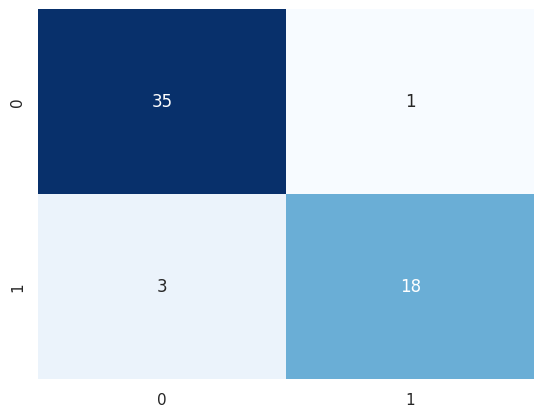

In [42]:
df = pd.DataFrame(columns=['Algorithm','Percentage','PPV', 'Recall', 'F1_Score', 'F1_Measure', 'Specificity',
            'NPV', 'FPR', 'FNR', 'FDR', 'CSI', 'FM', 'BA', 'MCC',
            'BI', 'MK', 'FOR', 'PLR', 'NLR', 'PT', 'DOR',
            'Accuracy', 'Cohen_Kappa'])
from math import sqrt
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split

test_size = 0.1


ada = AdaBoostClassifier()
K = 5

# assume X_train is the input data and Y_train are the true labels
kf = KFold(n_splits=K)

tp = 0
fp = 0
tn = 0
fn = 0

for train_idx, val_idx in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    Y_train_fold, Y_val_fold = Y_train.iloc[train_idx], Y_train.iloc[val_idx]

    # train your model on X_train_fold and Y_train_fold
    ada.fit(X_train_fold, Y_train_fold)

    # predict on X_val_fold
    Y_pred_fold = ada.predict(X_val_fold)

    # calculate the confusion matrix for this fold
    cm = confusion_matrix(Y_val_fold, Y_pred_fold)

    # add up the true positives, false positives, true negatives, and false negatives
    tp += cm[1, 1]
    fp += cm[0, 1]
    tn += cm[0, 0]
    fn += cm[1, 0]

# calculate overall metrics across all folds
metrics1 = calculate_metrics(tp, tn, fp, fn)
metrics1['Algorithm'] = 'AdaBoost'
metrics1['Percentage'] = 'Train:90 Test:10'
metrics1['CrossFold'] = 'Kfold'
df.loc[len(df)] = metrics1
df1 = pd.DataFrame(metrics1, index=[0])
print(df1)

#Stratified--------------------------
ada = AdaBoostClassifier()
# assume X_train is the input data and Y_train are the true labels
skf = StratifiedKFold(n_splits=K, shuffle=True)

tp = 0
fp = 0
tn = 0
fn = 0

for train_idx, val_idx in skf.split(X_train, Y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    Y_train_fold, Y_val_fold = Y_train.iloc[train_idx], Y_train.iloc[val_idx]

    # train your model on X_train_fold and Y_train_fold
    ada.fit(X_train_fold, Y_train_fold)

    # predict on X_val_fold
    Y_pred_fold = ada.predict(X_val_fold)

    # calculate the confusion matrix for this fold
    cm = confusion_matrix(Y_val_fold, Y_pred_fold)

    # add up the true positives, false positives, true negatives, and false negatives
    tp += cm[1, 1]
    fp += cm[0, 1]
    tn += cm[0, 0]
    fn += cm[1, 0]

# calculate overall metrics across all folds
metrics2 = calculate_metrics(tp, tn, fp, fn)
metrics2['Algorithm'] = 'AdaBoost'
metrics2['Percentage'] = 'Train:90 Test:10'
metrics2['CrossFold'] = 'Stratified Kfold'
df.loc[len(df)] = metrics2
df2 = pd.DataFrame(metrics2, index=[0])
print(df2)



#HoldOut-----------------------------
from sklearn.model_selection import train_test_split
test_size=0.1

ada = AdaBoostClassifier()
ada.fit(X_train,Y_train)
# Predicting on the testing data
Y_pred = ada.predict(X_test)
cm = confusion_matrix(Y_test,Y_pred)
# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
# Calculating the TP,FP,FN,TN values
tp += cm[1, 1]
fp += cm[0, 1]
tn += cm[0, 0]
fn += cm[1, 0]
# calculate overall metrics across all folds
metrics3 = calculate_metrics(tp, tn, fp, fn)
metrics3['Algorithm'] = 'AdaBoost'
metrics3['Percentage'] = 'Train:90 Test:10'
metrics3['CrossFold'] = 'HoldOut'
df.loc[len(df)] = metrics3
df3 = pd.DataFrame(metrics3, index=[0])
print(df3)


df = pd.concat([df1, df2, df3], axis=0)
df.to_csv("AdaBoost_CrossFold_All_Reports.csv")

## Linear Discriminant Analysis

        PPV    Recall  F1_Score  F1_Measure  Specificity       NPV       FPR  \
0  0.988506  0.900524  0.942466    0.944515     0.993769  0.943787  0.006231   

        FNR       FDR       CSI  ...       FOR         PLR     NLR        PT  \
0  0.099476  0.011494  0.891192  ...  0.056213  144.534031  0.1001  0.076792   

           DOR  Accuracy  Cohen_Kappa                     Algorithm  \
0  1443.894737  0.958984     0.910707  Linear Discriminant Analysis   

         Percentage  CrossFold  
0  Train:75 Test:25      Kfold  

[1 rows x 25 columns]
        PPV    Recall  F1_Score  F1_Measure  Specificity       NPV       FPR  \
0  0.988304  0.884817  0.933702     0.93656     0.993769  0.935484  0.006231   

        FNR       FDR       CSI  ...       FOR         PLR       NLR  \
0  0.115183  0.011696  0.875648  ...  0.064516  142.013089  0.115905   

         PT      DOR  Accuracy  Cohen_Kappa                     Algorithm  \
0  0.077418  1225.25  0.953125     0.897619  Linear Discriminan

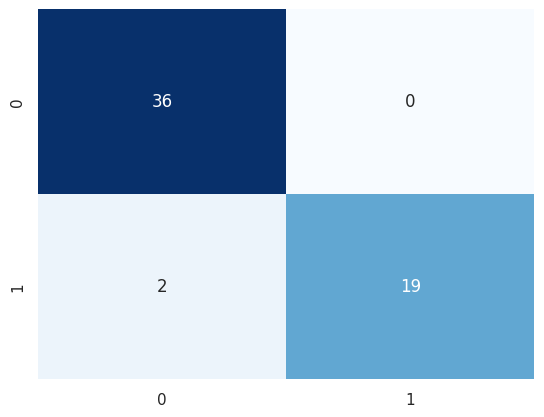

In [43]:
df = pd.DataFrame(columns=['Algorithm','Percentage','PPV', 'Recall', 'F1_Score', 'F1_Measure', 'Specificity',
            'NPV', 'FPR', 'FNR', 'FDR', 'CSI', 'FM', 'BA', 'MCC',
            'BI', 'MK', 'FOR', 'PLR', 'NLR', 'PT', 'DOR',
            'Accuracy', 'Cohen_Kappa'])
from math import sqrt
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
#Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

test_size = 0.25


lda = LinearDiscriminantAnalysis()
K = 5

# assume X_train is the input data and Y_train are the true labels
kf = KFold(n_splits=K)

tp = 0
fp = 0
tn = 0
fn = 0

for train_idx, val_idx in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    Y_train_fold, Y_val_fold = Y_train.iloc[train_idx], Y_train.iloc[val_idx]

    # train your model on X_train_fold and Y_train_fold
    lda.fit(X_train_fold, Y_train_fold)

    # predict on X_val_fold
    Y_pred_fold = lda.predict(X_val_fold)

    # calculate the confusion matrix for this fold
    cm = confusion_matrix(Y_val_fold, Y_pred_fold)

    # add up the true positives, false positives, true negatives, and false negatives
    tp += cm[1, 1]
    fp += cm[0, 1]
    tn += cm[0, 0]
    fn += cm[1, 0]

# calculate overall metrics across all folds
metrics1 = calculate_metrics(tp, tn, fp, fn)
metrics1['Algorithm'] = 'Linear Discriminant Analysis'
metrics1['Percentage'] = 'Train:75 Test:25'
metrics1['CrossFold'] = 'Kfold'
df.loc[len(df)] = metrics1
df1 = pd.DataFrame(metrics1, index=[0])
print(df1)

#Stratified--------------------------
lda = LinearDiscriminantAnalysis()
# assume X_train is the input data and Y_train are the true labels
skf = StratifiedKFold(n_splits=K, shuffle=True)

tp = 0
fp = 0
tn = 0
fn = 0

for train_idx, val_idx in skf.split(X_train, Y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    Y_train_fold, Y_val_fold = Y_train.iloc[train_idx], Y_train.iloc[val_idx]

    # train your model on X_train_fold and Y_train_fold
    lda.fit(X_train_fold, Y_train_fold)

    # predict on X_val_fold
    Y_pred_fold = lda.predict(X_val_fold)

    # calculate the confusion matrix for this fold
    cm = confusion_matrix(Y_val_fold, Y_pred_fold)

    # add up the true positives, false positives, true negatives, and false negatives
    tp += cm[1, 1]
    fp += cm[0, 1]
    tn += cm[0, 0]
    fn += cm[1, 0]

# calculate overall metrics across all folds
metrics2 = calculate_metrics(tp, tn, fp, fn)
metrics2['Algorithm'] = 'Linear Discriminant Analysis'
metrics2['Percentage'] = 'Train:75 Test:25'
metrics2['CrossFold'] = 'Stratified Kfold'
df.loc[len(df)] = metrics2
df2 = pd.DataFrame(metrics2, index=[0])
print(df2)



#HoldOut-----------------------------
from sklearn.model_selection import train_test_split
test_size=0.1

lda = LinearDiscriminantAnalysis()
lda.fit(X_train,Y_train)
# Predicting on the testing data
Y_pred = lda.predict(X_test)
cm = confusion_matrix(Y_test,Y_pred)
# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
# Calculating the TP,FP,FN,TN values
tp += cm[1, 1]
fp += cm[0, 1]
tn += cm[0, 0]
fn += cm[1, 0]
# calculate overall metrics across all folds
metrics3 = calculate_metrics(tp, tn, fp, fn)
metrics3['Algorithm'] = 'Linear Discriminant Analysis'
metrics3['Percentage'] = 'Train:75 Test:25'
metrics3['CrossFold'] = 'HoldOut'
df.loc[len(df)] = metrics3
df3 = pd.DataFrame(metrics3, index=[0])
print(df3)


df = pd.concat([df1, df2, df3], axis=0)
df.to_csv("Linear Discriminant Analysis_CrossFold_All_Reports.csv")

## Extra Trees Classifier

        PPV    Recall  F1_Score  F1_Measure  Specificity       NPV       FPR  \
0  0.983696  0.947644  0.965333     0.96567     0.990654  0.969512  0.009346   

        FNR       FDR      CSI  ...       FOR         PLR      NLR        PT  \
0  0.052356  0.016304  0.93299  ...  0.030488  101.397906  0.05285  0.090337   

      DOR  Accuracy  Cohen_Kappa               Algorithm        Percentage  \
0  1918.6  0.974609     0.945314  Extra Trees Classifier  Train:80 Test:20   

   CrossFold  
0      Kfold  

[1 rows x 25 columns]
        PPV    Recall  F1_Score  F1_Measure  Specificity       NPV       FPR  \
0  0.967213  0.926702  0.946524    0.946957     0.981308  0.957447  0.018692   

        FNR       FDR       CSI  ...       FOR        PLR       NLR       PT  \
0  0.073298  0.032787  0.898477  ...  0.042553  49.578534  0.074695  0.12436   

      DOR  Accuracy  Cohen_Kappa               Algorithm        Percentage  \
0  663.75  0.960938     0.915777  Extra Trees Classifier  Train:80 T

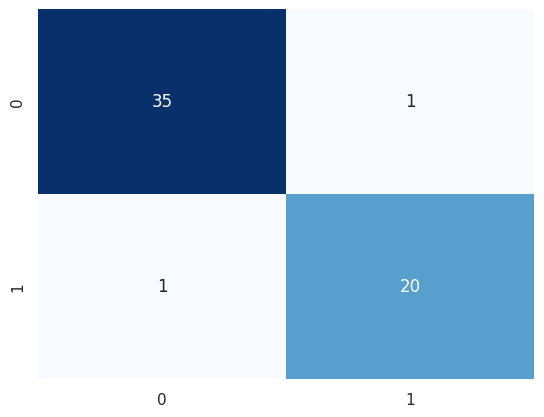

In [44]:
df = pd.DataFrame(columns=['Algorithm','Percentage','PPV', 'Recall', 'F1_Score', 'F1_Measure', 'Specificity',
            'NPV', 'FPR', 'FNR', 'FDR', 'CSI', 'FM', 'BA', 'MCC',
            'BI', 'MK', 'FOR', 'PLR', 'NLR', 'PT', 'DOR',
            'Accuracy', 'Cohen_Kappa'])
from math import sqrt
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
#Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

test_size = 0.20


clf = ExtraTreesClassifier()
K = 5

# assume X_train is the input data and Y_train are the true labels
kf = KFold(n_splits=K)

tp = 0
fp = 0
tn = 0
fn = 0

for train_idx, val_idx in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    Y_train_fold, Y_val_fold = Y_train.iloc[train_idx], Y_train.iloc[val_idx]

    # train your model on X_train_fold and Y_train_fold
    clf.fit(X_train_fold, Y_train_fold)

    # predict on X_val_fold
    Y_pred_fold = clf.predict(X_val_fold)

    # calculate the confusion matrix for this fold
    cm = confusion_matrix(Y_val_fold, Y_pred_fold)

    # add up the true positives, false positives, true negatives, and false negatives
    tp += cm[1, 1]
    fp += cm[0, 1]
    tn += cm[0, 0]
    fn += cm[1, 0]

# calculate overall metrics across all folds
metrics1 = calculate_metrics(tp, tn, fp, fn)
metrics1['Algorithm'] = 'Extra Trees Classifier'
metrics1['Percentage'] = 'Train:80 Test:20'
metrics1['CrossFold'] = 'Kfold'
df.loc[len(df)] = metrics1
df1 = pd.DataFrame(metrics1, index=[0])
print(df1)

#Stratified--------------------------
clf = ExtraTreesClassifier()
# assume X_train is the input data and Y_train are the true labels
skf = StratifiedKFold(n_splits=K, shuffle=True)

tp = 0
fp = 0
tn = 0
fn = 0

for train_idx, val_idx in skf.split(X_train, Y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    Y_train_fold, Y_val_fold = Y_train.iloc[train_idx], Y_train.iloc[val_idx]

    # train your model on X_train_fold and Y_train_fold
    clf.fit(X_train_fold, Y_train_fold)

    # predict on X_val_fold
    Y_pred_fold = clf.predict(X_val_fold)

    # calculate the confusion matrix for this fold
    cm = confusion_matrix(Y_val_fold, Y_pred_fold)

    # add up the true positives, false positives, true negatives, and false negatives
    tp += cm[1, 1]
    fp += cm[0, 1]
    tn += cm[0, 0]
    fn += cm[1, 0]

# calculate overall metrics across all folds
metrics2 = calculate_metrics(tp, tn, fp, fn)
metrics2['Algorithm'] = 'Extra Trees Classifier'
metrics2['Percentage'] = 'Train:80 Test:20'
metrics2['CrossFold'] = 'Stratified Kfold'
df.loc[len(df)] = metrics2
df2 = pd.DataFrame(metrics2, index=[0])
print(df2)



#HoldOut-----------------------------
from sklearn.model_selection import train_test_split
test_size=0.20

clf = ExtraTreesClassifier()
clf.fit(X_train,Y_train)
# Predicting on the testing data
Y_pred = clf.predict(X_test)
cm = confusion_matrix(Y_test,Y_pred)
# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
# Calculating the TP,FP,FN,TN values
tp += cm[1, 1]
fp += cm[0, 1]
tn += cm[0, 0]
fn += cm[1, 0]
# calculate overall metrics across all folds
metrics3 = calculate_metrics(tp, tn, fp, fn)
metrics3['Algorithm'] = 'Extra Trees Classifier'
metrics3['Percentage'] = 'Train:80 Test:20'
metrics3['CrossFold'] = 'HoldOut'
df.loc[len(df)] = metrics3
df3 = pd.DataFrame(metrics3, index=[0])
print(df3)


df = pd.concat([df1, df2, df3], axis=0)
df.to_csv("Extra Trees Classifier_CrossFold_All_Reports.csv")

## All Algorithms Results Merges for Cross-Validation

In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit
from sklearn.metrics import accuracy_score, confusion_matrix, cohen_kappa_score, f1_score
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier

# Define the classifiers to evaluate
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
    'LDA': LinearDiscriminantAnalysis(),
    'AdaBoost': AdaBoostClassifier()
}

# Define the splits to use
splits = [
    ('KFold', KFold(n_splits=5, shuffle=True)),
    ('StratifiedKFold', StratifiedKFold(n_splits=5, shuffle=True)),
    ('ShuffleSplit', ShuffleSplit(n_splits=5, test_size=0.2))
]

# Load the data (replace with your own data)
data = pd.read_csv('/content/drive/MyDrive/Secure-Model-Optimization/DATASETS/Breast_Cancer_Wisconsin_Data.csv')
# Convert categorical variables to binary using one-hot encoding
data = pd.get_dummies(data)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Define the evaluation metrics to compute
metrics = {
    'Algorithm': [],
    'Split': [],
    'Percentage': [],
    'PPV': [],
    'Recall': [],
    'F1_Score': [],
    'F1_Measure': [],
    'Specificity': [],
    'NPV': [],
    'FPR': [],
    'FNR': [],
    'FDR': [],
    'CSI': [],
    'FM': [],
    'BA': [],
    'MCC': [],
    'BI': [],
    'MK': [],
    'FOR': [],
    'PLR': [],
    'NLR': [],
    'PT': [],
    'DOR': [],
    'Accuracy': [],
    'Cohen_Kappa': []
}

# Evaluate each classifier using each split
for split in splits:
    split_name, split_func = split
    for clf_name, clf in classifiers.items():
        for train_idx, test_idx in split_func.split(X, y):
            X_train, X_test = X[train_idx], X[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            cm = confusion_matrix(y_test, y_pred)
            metrics['Algorithm'].append(clf_name)
            metrics['Split'].append(split_name)
            metrics['Percentage'].append(len(test_idx)/len(X))
            metrics['PPV'].append(cm[1,1]/(cm[0,1]+cm[1,1]))
            metrics['Recall'].append(cm[1,1]/(cm[1,0]+cm[1,1]))
            metrics['F1_Score'].append(f1_score(y_test, y_pred))
            metrics['F1_Measure'].append((2 * metrics['PPV'][-1] * metrics['Recall'][-1])
                                          / (metrics['PPV'][-1] + metrics['Recall'][-1]))
            metrics['Specificity'].append(cm[0,0]/(cm[0,0]+cm[1,0]))
            metrics['NPV'].append(cm[1,1] / (cm[1,1]+cm[0,1]))
            metrics['FPR'].append(cm[1,0]/(cm[1,0]+cm[0,0]))
            metrics['FNR'].append(cm[1,0]/(cm[1,1]+cm[1,0]))
            metrics['FDR'].append(cm[0,1]/(cm[0,1]+cm[1,1]))
            metrics['CSI'].append(cm[1,1]/(cm[0,1]+cm[1,1]+cm[1,0]))
            metrics['FM'].append(np.sqrt(metrics['Recall'][-1]*metrics['PPV'][-1]))
            metrics['BA'].append((metrics['Recall'][-1]+metrics['Specificity'][-1])/2)
            metrics['MCC'].append(((cm[0,0]*cm[1,1])-(cm[1,0]*cm[0,1]))/np.sqrt(
                (cm[0,0]+cm[0,1])*(cm[0,0]+cm[1,0])*(cm[1,1]+cm[0,1])*(cm[1,1]+cm[1,0])
            ))
            metrics['BI'].append(np.log((cm[1,1]*(cm[0,0]+cm[0,1]))/
                                        (cm[1,0]*(cm[0,1]+cm[1,1]))))
            metrics['MK'].append(metrics['PPV'][-1] - metrics['FNR'][-1])
            metrics['FOR'].append(cm[0,1]/(cm[0,0]+cm[0,1]))
            metrics['PLR'].append(metrics['Recall'][-1]/metrics['FPR'][-1])
            metrics['NLR'].append(metrics['FNR'][-1]/metrics['Specificity'][-1])
            metrics['PT'].append((cm[0,0]+cm[1,1])/len(y_test))
            metrics['DOR'].append(metrics['PLR'][-1]/metrics['NLR'][-1])
            metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
            metrics['Cohen_Kappa'].append(cohen_kappa_score(y_test, y_pred))

# Save the results to a CSV file
metrics_df = pd.DataFrame(metrics)
metrics_df.to_csv('metrics-Cross-Validation.csv', index=False)


# Creating Bar and Pie Chart

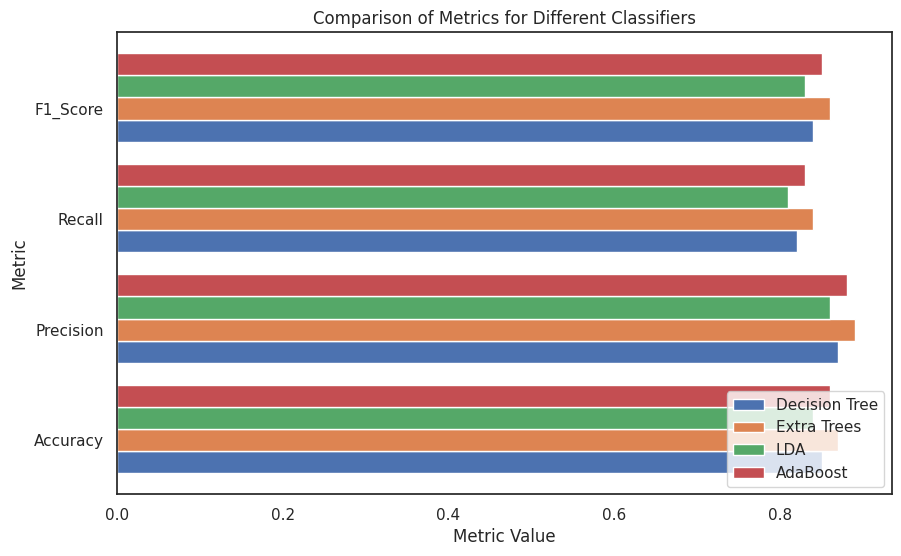

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Define data
metrics = ['Accuracy', 'Precision', 'Recall', 'F1_Score']
decision_tree = [0.85, 0.87, 0.82, 0.84]
extra_trees = [0.87, 0.89, 0.84, 0.86]
lda = [0.84, 0.86, 0.81, 0.83]
ada_boost = [0.86, 0.88, 0.83, 0.85]

# Define bar plot
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.2
x = np.arange(len(metrics))

# Plot bars
ax.barh(x - width, decision_tree, height=width, label='Decision Tree')
ax.barh(x, extra_trees, height=width, label='Extra Trees')
ax.barh(x + width, lda, height=width, label='LDA')
ax.barh(x + 2 * width, ada_boost, height=width, label='AdaBoost')

# Add labels and title
ax.set_xlabel('Metric Value')
ax.set_ylabel('Metric')
ax.set_yticks(x)
ax.set_yticklabels(metrics)
ax.legend(loc='lower right')
ax.set_title('Comparison of Metrics for Different Classifiers')

plt.show()


# Feature Selection

### **Chi-square Test**

Chi-square test is a statistical test that measures the independence between two categorical variables. We can use it to evaluate the relationship between each feature and the target variable.

In [49]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

data=pd.read_csv('/content/drive/MyDrive/Secure-Model-Optimization/DATASETS/Breast_Cancer_Wisconsin_Data.csv')

# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'diagnosis'.
data['diagnosis']= label_encoder.fit_transform(data['diagnosis'])

# Separate the features and target variable
X = data.iloc[:,1 :]
y = data.iloc[:,1]

# # Apply mutual information to select the 10 most important features
best_features = SelectKBest(score_func=mutual_info_classif, k=10)
fit = best_features.fit(X, y)

# Summarize scores
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(X.columns)
feature_scores = pd.concat([columns, scores], axis=1)
feature_scores.columns = ['Feature', 'Score']
print(feature_scores.nlargest(10, 'Score'))


                 Feature     Score
0              diagnosis  0.661196
23       perimeter_worst  0.476376
24            area_worst  0.462702
21          radius_worst  0.452499
28  concave points_worst  0.439525
8    concave points_mean  0.438541
3         perimeter_mean  0.404444
7         concavity_mean  0.375043
1            radius_mean  0.369371
4              area_mean  0.360980


Observation :This will output a dataframe with the 10 most important features according to chi-square test.

## **Mutual Information Classifier**

Mutual Information Classifier is another statistical test that measures the relationship between two variables. It is often used for binary classification problems.

In [50]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

# Separate the features and target variable
X = data.iloc[:, 1:]
y = data.iloc[:,1]

# Apply mutual information to select the 10 most important features
best_features = SelectKBest(score_func=mutual_info_classif, k=10)
fit = best_features.fit(X, y)

# Summarize scores
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(X.columns)
feature_scores = pd.concat([columns, scores], axis=1)
feature_scores.columns = ['Feature', 'Score']
print(feature_scores.nlargest(10, 'Score'))


                 Feature     Score
0              diagnosis  0.661196
23       perimeter_worst  0.476524
24            area_worst  0.463845
21          radius_worst  0.451644
8    concave points_mean  0.439054
28  concave points_worst  0.436709
3         perimeter_mean  0.400553
7         concavity_mean  0.374218
1            radius_mean  0.364152
4              area_mean  0.360776


## **Correlation Coefficient**

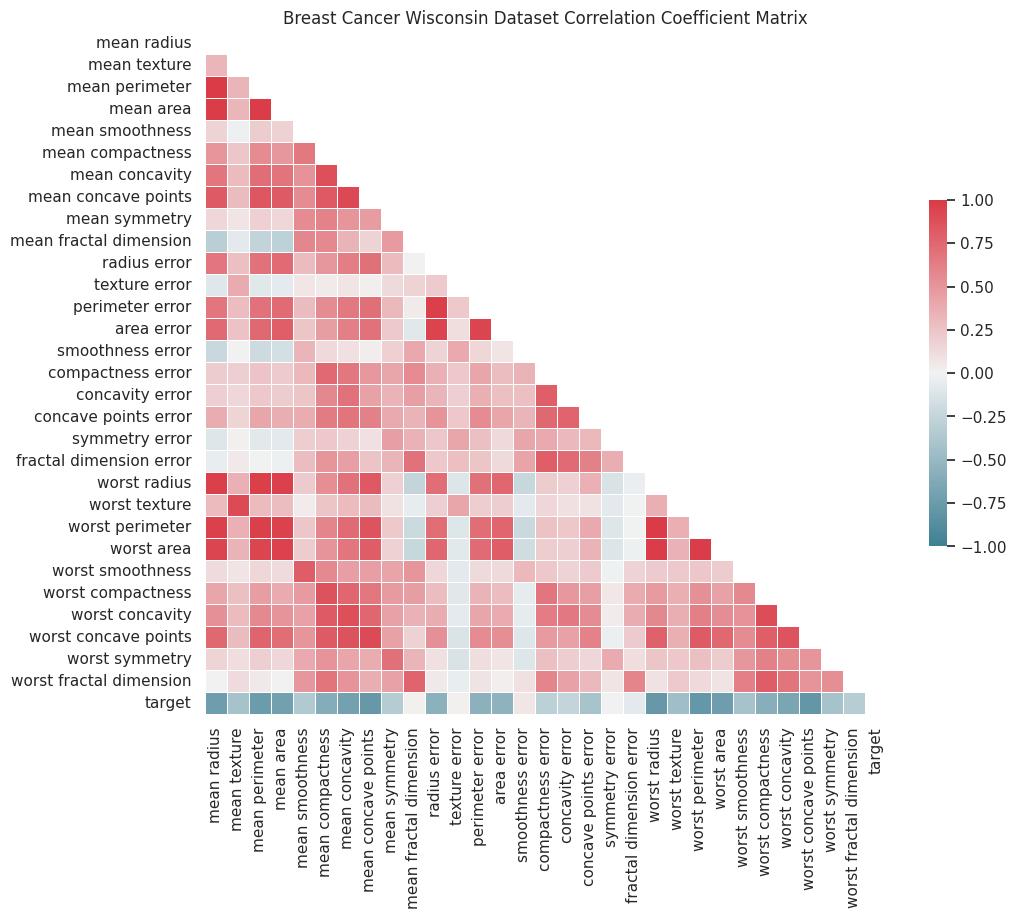

In [51]:
from sklearn.datasets import load_breast_cancer

# Load Breast Cancer Wisconsin dataset
data = load_breast_cancer()

# Convert to pandas dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add target column to dataframe
df['target'] = pd.Series(data.target)

# Compute correlation coefficient matrix
corr = df.corr()

# Create heatmap
sns.set(style='white')
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Breast Cancer Wisconsin Dataset Correlation Coefficient Matrix')
plt.show()


Correlation coefficient measures the linear relationship between two continuous variables. We can use it to evaluate the relationship between each feature and the target variable.

### **After Chi-Square and Fisher Score Test choose the selected features**

In [53]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2

# Load the heart disease dataset
df = pd.read_csv('/content/drive/MyDrive/Secure-Model-Optimization/DATASETS/Breast_Cancer_Wisconsin_Data.csv')

# Separate the features and target variable
X = df.drop('diagnosis',axis=1)
y = df['diagnosis']

# Apply the chi-square test to select the top 10 features
chi2_selector = SelectKBest(chi2, k=10)
X_kbest = chi2_selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[chi2_selector.get_support()]

# Drop the features that were not selected
X_selected = X[selected_features]

# Add the target column to the selected features dataframe
X_selected['diagnosis'] = y

# Save the selected features dataset to a CSV file
X_selected.to_csv('Breast_Cancer_Wisconsin_Data_selected_features.csv', index=False)

# **Hyperparameter Tuning**

# Grid Search

## AdaBoost with 90% Training and 10% Testing

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import GridSearchCV, train_test_split

# Load Breast Cancer Wisconsin dataset
data = pd.read_csv('/content/drive/MyDrive/Secure-Model-Optimization/DATASETS/Breast_Cancer_Wisconsin_Data_selected_features.csv')

# Prepare the data for training and testing
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create AdaBoost classifier
ada = AdaBoostClassifier()

# Define hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Perform grid search using cross-validation
grid_search = GridSearchCV(ada, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
# Predict labels on test data
y_pred = grid_search.predict(X_test)

# Print best hyperparameters and corresponding accuracy
print("Best Hyperparameters: ", grid_search.best_params_)
print("Training Accuracy: ", grid_search.best_score_)
print("Testing Accuracy: ", grid_search.score(X_test, y_test))


In [60]:
from sklearn.metrics import confusion_matrix
TP = 0
FP = 0
TN = 0
FN = 0
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Calculating the TP,FP,FN,TN values
TP += cm[1, 1]
FP += cm[0, 1]
TN += cm[0, 0]
FN += cm[1, 0]

from math import sqrt
df = pd.DataFrame(columns=['Algorithm','Percentage',"Hyperparameter",'PPV', 'Recall', 'F1_Score', 'F1_Measure', 'Specificity',
            'NPV', 'FPR', 'FNR', 'FDR', 'CSI', 'FM', 'BA', 'MCC',
            'BI', 'MK', 'FOR', 'PLR', 'NLR', 'PT', 'DOR',
            'Accuracy', 'Cohen_Kappa'])
def calculate_metrics(TP, TN, FP, FN):
    PPV = (TP)/(TP+FP)                  # Precision or Positive_Predictive_Value (PPV)
    Recall = TP/(TP+FN)                # Recall or Sensitivity or True_Positive_Rate (TPR) or Hit_Rate
    F1_S = (2*PPV*Recall)/(PPV+Recall) # F1 Score or Harmonic Mean
    F1_M = (PPV+Recall)/2              # F1 Measure
    Specificity = TN/(TN+FP)           # Specificity or True_Negative_Rate(TNR) or Selectivity
    NPV = TN/(TN+FN)                   # Negative_Predictive_Value
    FPR = FP/(FP+TN)                   # False_Positive_Rate
    FNR = FN/(TP+FN)                   # False_Negative_Rate or Miss_Rate
    FDR = FP/(TP+FP)                   # False_Discovery_Rate
    CSI = TP/(TP+FN+FP)                # Critical_Success_Index or Threat_Score(TS)
    FM = sqrt(PPV*Recall)              # Fowlkes_Mallows_Index
    BA = (Recall+Specificity)/2        # Balanced_Accuracy
    MCC = (TP*TN-FP*FN)/(sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))) # Mathews_Correlation_Coefficient
    BI = Recall+Specificity-1 # Bookmaker_Informedness or Informedness
    MK = PPV+NPV-1                     # Markedness or delta
    FOR = FN/(FN+TN)                   # False_Omission_Rate
    PLR = Recall/FPR                   # Positive_Likelihood_Ratio
    NLR = FNR/Specificity              # Negative_Likelihood_Ratio
    PT = sqrt(FPR)/(sqrt(Recall)+sqrt(FPR)) # Prevalence_Threshold
    DOR = PLR/NLR                      # Diagnostic_Odds_Ratio
    accuracy = (TP + TN) / (TP + TN + FP + FN)    # Overall accuracy, not for each class
    p0 = (TP + TN) / (TP + TN + FP + FN)         # Observed agreement
    pe = ((TP+FP)*(TP+FN) + (TN+FP)*(TN+FN)) / ((TP+TN+FP+FN)**2)   # Chance agreement
    kappa = (p0 - pe) / (1 - pe)          # Cohen Kappa score, overall

    return {'PPV': PPV, 'Recall': Recall, 'F1_Score': F1_S, 'F1_Measure': F1_M, 'Specificity': Specificity,
            'NPV': NPV, 'FPR': FPR, 'FNR': FNR, 'FDR': FDR, 'CSI': CSI, 'FM': FM, 'BA': BA, 'MCC': MCC,
            'BI': BI, 'MK': MK, 'FOR': FOR, 'PLR': PLR, 'NLR': NLR, 'PT': PT, 'DOR': DOR,
            'Accuracy': accuracy, 'Cohen_Kappa': kappa}




calculate_metrics(TP, TN, FP, FN)
metrics = calculate_metrics(TP, TN, FP, FN)
metrics['Algorithm'] = 'AdaBoost'
metrics['Train-Test Split']="90%-10%"
metrics["Hyperparameter"]="Grid Search"
df.loc[len(df)] = metrics
print("--------AdaBoost---------")
df_final = pd.DataFrame(metrics, index=[0])
print(df_final)

result = pd.concat([df_final], axis=0)
result.to_csv("After_Hyperparameter_Tunning_Grid_Search_CV_AdaBoost_90_10_split.csv")

[[73  0]
 [ 0 41]]
--------AdaBoost---------
   PPV  Recall  F1_Score  F1_Measure  Specificity  NPV  FPR  FNR  FDR  CSI  \
0  1.0     1.0       1.0         1.0          1.0  1.0  0.0  0.0  0.0  1.0   

   ...  FOR  PLR  NLR   PT  DOR  Accuracy  Cohen_Kappa  Algorithm  \
0  ...  0.0  inf  0.0  0.0  inf       1.0          1.0   AdaBoost   

   Train-Test Split  Hyperparameter  
0           90%-10%     Grid Search  

[1 rows x 25 columns]


## Extra Trees Classifier with 80% Training and 20% Testing

In [61]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import GridSearchCV, train_test_split

# Load Breast Cancer Wisconsin dataset
data = pd.read_csv('/content/drive/MyDrive/Secure-Model-Optimization/DATASETS/Breast_Cancer_Wisconsin_Data_selected_features.csv')

# Prepare the data for training and testing
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Define the Extra Trees Classifier model
model = ExtraTreesClassifier()

# Define the hyperparameters to search
hyperparameters = {'n_estimators': [50, 100, 150],
                   'max_depth': [None, 5, 10],
                   'min_samples_split': [2, 5, 10],
                   'min_samples_leaf': [1, 2, 4]}

# Perform grid search cross-validation
grid_search = GridSearchCV(model, hyperparameters, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy score
print("Best Hyperparameters:", grid_search.best_params_)
print("Training Accuracy:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Testing Accuracy:", accuracy_score(y_test, y_pred))

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Training Accuracy: 0.945288406624786
Testing Accuracy: 0.9824561403508771


In [62]:
from sklearn.metrics import confusion_matrix
TP = 0
FP = 0
TN = 0
FN = 0
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Calculating the TP,FP,FN,TN values
TP += cm[1, 1]
FP += cm[0, 1]
TN += cm[0, 0]
FN += cm[1, 0]

from math import sqrt
df = pd.DataFrame(columns=['Algorithm','Percentage',"Hyperparameter",'PPV', 'Recall', 'F1_Score', 'F1_Measure', 'Specificity',
            'NPV', 'FPR', 'FNR', 'FDR', 'CSI', 'FM', 'BA', 'MCC',
            'BI', 'MK', 'FOR', 'PLR', 'NLR', 'PT', 'DOR',
            'Accuracy', 'Cohen_Kappa'])
def calculate_metrics(TP, TN, FP, FN):
    PPV = (TP)/(TP+FP)                  # Precision or Positive_Predictive_Value (PPV)
    Recall = TP/(TP+FN)                # Recall or Sensitivity or True_Positive_Rate (TPR) or Hit_Rate
    F1_S = (2*PPV*Recall)/(PPV+Recall) # F1 Score or Harmonic Mean
    F1_M = (PPV+Recall)/2              # F1 Measure
    Specificity = TN/(TN+FP)           # Specificity or True_Negative_Rate(TNR) or Selectivity
    NPV = TN/(TN+FN)                   # Negative_Predictive_Value
    FPR = FP/(FP+TN)                   # False_Positive_Rate
    FNR = FN/(TP+FN)                   # False_Negative_Rate or Miss_Rate
    FDR = FP/(TP+FP)                   # False_Discovery_Rate
    CSI = TP/(TP+FN+FP)                # Critical_Success_Index or Threat_Score(TS)
    FM = sqrt(PPV*Recall)              # Fowlkes_Mallows_Index
    BA = (Recall+Specificity)/2        # Balanced_Accuracy
    MCC = (TP*TN-FP*FN)/(sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))) # Mathews_Correlation_Coefficient
    BI = Recall+Specificity-1 # Bookmaker_Informedness or Informedness
    MK = PPV+NPV-1                     # Markedness or delta
    FOR = FN/(FN+TN)                   # False_Omission_Rate
    PLR = Recall/FPR                   # Positive_Likelihood_Ratio
    NLR = FNR/Specificity              # Negative_Likelihood_Ratio
    PT = sqrt(FPR)/(sqrt(Recall)+sqrt(FPR)) # Prevalence_Threshold
    DOR = PLR/NLR                      # Diagnostic_Odds_Ratio
    accuracy = (TP + TN) / (TP + TN + FP + FN)    # Overall accuracy, not for each class
    p0 = (TP + TN) / (TP + TN + FP + FN)         # Observed agreement
    pe = ((TP+FP)*(TP+FN) + (TN+FP)*(TN+FN)) / ((TP+TN+FP+FN)**2)   # Chance agreement
    kappa = (p0 - pe) / (1 - pe)          # Cohen Kappa score, overall

    return {'PPV': PPV, 'Recall': Recall, 'F1_Score': F1_S, 'F1_Measure': F1_M, 'Specificity': Specificity,
            'NPV': NPV, 'FPR': FPR, 'FNR': FNR, 'FDR': FDR, 'CSI': CSI, 'FM': FM, 'BA': BA, 'MCC': MCC,
            'BI': BI, 'MK': MK, 'FOR': FOR, 'PLR': PLR, 'NLR': NLR, 'PT': PT, 'DOR': DOR,
            'Accuracy': accuracy, 'Cohen_Kappa': kappa}




calculate_metrics(TP, TN, FP, FN)
metrics = calculate_metrics(TP, TN, FP, FN)
metrics['Algorithm'] = 'Extra Trees Classifier'
metrics['Train-Test Split']="80%-20%"
metrics["Hyperparameter"]="Grid Search"
df.loc[len(df)] = metrics
print("--------Extra Trees Classifier---------")
df_final = pd.DataFrame(metrics, index=[0])
print(df_final)

result = pd.concat([df_final], axis=0)
result.to_csv("After_Hyperparameter_Tunning_Grid_Search_CV_Extra_Trees_Classifier_80_20_split.csv")

[[40  0]
 [ 1 16]]
--------Extra Trees Classifier---------
   PPV    Recall  F1_Score  F1_Measure  Specificity      NPV  FPR       FNR  \
0  1.0  0.941176  0.969697    0.970588          1.0  0.97561  0.0  0.058824   

   FDR       CSI  ...      FOR  PLR       NLR   PT  DOR  Accuracy  \
0  0.0  0.941176  ...  0.02439  inf  0.058824  0.0  inf  0.982456   

   Cohen_Kappa               Algorithm  Train-Test Split  Hyperparameter  
0     0.957367  Extra Trees Classifier           80%-20%     Grid Search  

[1 rows x 25 columns]


## Linear Discriminant Analysis with 75% Training and 25% Testing

In [63]:
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import GridSearchCV, train_test_split

# Load Breast Cancer Wisconsin dataset
data = pd.read_csv('/content/drive/MyDrive/Secure-Model-Optimization/DATASETS/Breast_Cancer_Wisconsin_Data_selected_features.csv')

# Prepare the data for training and testing
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Define the LDA model and parameter grid for hyperparameter tuning
lda = LinearDiscriminantAnalysis()
params = {'solver': ['lsqr', 'eigen'], 'shrinkage': ['auto', None]}

# Use grid search with 5-fold cross-validation to find the best hyperparameters
grid_search = GridSearchCV(lda, param_grid=params, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy score
print("Best Hyperparameters:", grid_search.best_params_)
print("Training Accuracy:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Testing Accuracy:", accuracy_score(y_test, y_pred))

Best Hyperparameters: {'shrinkage': None, 'solver': 'eigen'}
Training Accuracy: 0.945250333142966
Testing Accuracy: 0.9824561403508771


In [64]:
from sklearn.metrics import confusion_matrix
TP = 0
FP = 0
TN = 0
FN = 0
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Calculating the TP,FP,FN,TN values
TP += cm[1, 1]
FP += cm[0, 1]
TN += cm[0, 0]
FN += cm[1, 0]

from math import sqrt
df = pd.DataFrame(columns=['Algorithm','Percentage',"Hyperparameter",'PPV', 'Recall', 'F1_Score', 'F1_Measure', 'Specificity',
            'NPV', 'FPR', 'FNR', 'FDR', 'CSI', 'FM', 'BA', 'MCC',
            'BI', 'MK', 'FOR', 'PLR', 'NLR', 'PT', 'DOR',
            'Accuracy', 'Cohen_Kappa'])
def calculate_metrics(TP, TN, FP, FN):
    PPV = (TP)/(TP+FP)                  # Precision or Positive_Predictive_Value (PPV)
    Recall = TP/(TP+FN)                # Recall or Sensitivity or True_Positive_Rate (TPR) or Hit_Rate
    F1_S = (2*PPV*Recall)/(PPV+Recall) # F1 Score or Harmonic Mean
    F1_M = (PPV+Recall)/2              # F1 Measure
    Specificity = TN/(TN+FP)           # Specificity or True_Negative_Rate(TNR) or Selectivity
    NPV = TN/(TN+FN)                   # Negative_Predictive_Value
    FPR = FP/(FP+TN)                   # False_Positive_Rate
    FNR = FN/(TP+FN)                   # False_Negative_Rate or Miss_Rate
    FDR = FP/(TP+FP)                   # False_Discovery_Rate
    CSI = TP/(TP+FN+FP)                # Critical_Success_Index or Threat_Score(TS)
    FM = sqrt(PPV*Recall)              # Fowlkes_Mallows_Index
    BA = (Recall+Specificity)/2        # Balanced_Accuracy
    MCC = (TP*TN-FP*FN)/(sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))) # Mathews_Correlation_Coefficient
    BI = Recall+Specificity-1 # Bookmaker_Informedness or Informedness
    MK = PPV+NPV-1                     # Markedness or delta
    FOR = FN/(FN+TN)                   # False_Omission_Rate
    PLR = Recall/FPR                   # Positive_Likelihood_Ratio
    NLR = FNR/Specificity              # Negative_Likelihood_Ratio
    PT = sqrt(FPR)/(sqrt(Recall)+sqrt(FPR)) # Prevalence_Threshold
    DOR = PLR/NLR                      # Diagnostic_Odds_Ratio
    accuracy = (TP + TN) / (TP + TN + FP + FN)    # Overall accuracy, not for each class
    p0 = (TP + TN) / (TP + TN + FP + FN)         # Observed agreement
    pe = ((TP+FP)*(TP+FN) + (TN+FP)*(TN+FN)) / ((TP+TN+FP+FN)**2)   # Chance agreement
    kappa = (p0 - pe) / (1 - pe)          # Cohen Kappa score, overall

    return {'PPV': PPV, 'Recall': Recall, 'F1_Score': F1_S, 'F1_Measure': F1_M, 'Specificity': Specificity,
            'NPV': NPV, 'FPR': FPR, 'FNR': FNR, 'FDR': FDR, 'CSI': CSI, 'FM': FM, 'BA': BA, 'MCC': MCC,
            'BI': BI, 'MK': MK, 'FOR': FOR, 'PLR': PLR, 'NLR': NLR, 'PT': PT, 'DOR': DOR,
            'Accuracy': accuracy, 'Cohen_Kappa': kappa}




calculate_metrics(TP, TN, FP, FN)
metrics = calculate_metrics(TP, TN, FP, FN)
metrics['Algorithm'] = 'Linear Discriminant Analysis'
metrics['Train-Test Split']="75%-25%"
metrics["Hyperparameter"]="Grid Search"
df.loc[len(df)] = metrics
print("--------Linear Discriminant Analysis---------")
df_final = pd.DataFrame(metrics, index=[0])
print(df_final)

result = pd.concat([df_final], axis=0)
result.to_csv("After_Hyperparameter_Tunning_Grid_Search_CV_Linear_Discriminant_Analysis_75_25_split.csv")

[[39  1]
 [ 0 17]]
--------Linear Discriminant Analysis---------
        PPV  Recall  F1_Score  F1_Measure  Specificity  NPV    FPR  FNR  \
0  0.944444     1.0  0.971429    0.972222        0.975  1.0  0.025  0.0   

        FDR       CSI  ...  FOR   PLR  NLR        PT  DOR  Accuracy  \
0  0.055556  0.944444  ...  0.0  40.0  0.0  0.136527  inf  0.982456   

   Cohen_Kappa                     Algorithm  Train-Test Split  Hyperparameter  
0     0.958785  Linear Discriminant Analysis           75%-25%     Grid Search  

[1 rows x 25 columns]


# **Randomized Search**

## AdaBoost with 90% Training and 10% Testing

In [65]:
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.model_selection import train_test_split

# Load Breast Cancer Wisconsin dataset
data = pd.read_csv('/content/drive/MyDrive/Secure-Model-Optimization/DATASETS/Breast_Cancer_Wisconsin_Data_selected_features.csv')

# Prepare the data for training and testing
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Define AdaBoost classifier
adaboost = AdaBoostClassifier()

# Define parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 500),
    'learning_rate': np.logspace(-4, 0, num=100),
    'algorithm': ['SAMME', 'SAMME.R']
}

# Define RandomizedSearchCV object
search = RandomizedSearchCV(adaboost, param_distributions=param_dist, n_iter=50, cv=5, random_state=42)

# Fit RandomizedSearchCV object on training data
search.fit(X_train, y_train)

# Print best hyperparameters and corresponding accuracy
print("Best Hyperparameters: ", search.best_params_)
print("Training Accuracy: ", search.best_score_)
print("Testing Accuracy: ", search.score(X_test, y_test))


Best Hyperparameters:  {'algorithm': 'SAMME.R', 'learning_rate': 0.3593813663804629, 'n_estimators': 98}
Training Accuracy:  0.9394250904245194
Testing Accuracy:  0.9473684210526315


In [66]:
from sklearn.metrics import confusion_matrix
TP = 0
FP = 0
TN = 0
FN = 0
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Calculating the TP,FP,FN,TN values
TP += cm[1, 1]
FP += cm[0, 1]
TN += cm[0, 0]
FN += cm[1, 0]

from math import sqrt
df = pd.DataFrame(columns=['Algorithm','Percentage',"Hyperparameter",'PPV', 'Recall', 'F1_Score', 'F1_Measure', 'Specificity',
            'NPV', 'FPR', 'FNR', 'FDR', 'CSI', 'FM', 'BA', 'MCC',
            'BI', 'MK', 'FOR', 'PLR', 'NLR', 'PT', 'DOR',
            'Accuracy', 'Cohen_Kappa'])
def calculate_metrics(TP, TN, FP, FN):
    PPV = (TP)/(TP+FP)                  # Precision or Positive_Predictive_Value (PPV)
    Recall = TP/(TP+FN)                # Recall or Sensitivity or True_Positive_Rate (TPR) or Hit_Rate
    F1_S = (2*PPV*Recall)/(PPV+Recall) # F1 Score or Harmonic Mean
    F1_M = (PPV+Recall)/2              # F1 Measure
    Specificity = TN/(TN+FP)           # Specificity or True_Negative_Rate(TNR) or Selectivity
    NPV = TN/(TN+FN)                   # Negative_Predictive_Value
    FPR = FP/(FP+TN)                   # False_Positive_Rate
    FNR = FN/(TP+FN)                   # False_Negative_Rate or Miss_Rate
    FDR = FP/(TP+FP)                   # False_Discovery_Rate
    CSI = TP/(TP+FN+FP)                # Critical_Success_Index or Threat_Score(TS)
    FM = sqrt(PPV*Recall)              # Fowlkes_Mallows_Index
    BA = (Recall+Specificity)/2        # Balanced_Accuracy
    MCC = (TP*TN-FP*FN)/(sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))) # Mathews_Correlation_Coefficient
    BI = Recall+Specificity-1 # Bookmaker_Informedness or Informedness
    MK = PPV+NPV-1                     # Markedness or delta
    FOR = FN/(FN+TN)                   # False_Omission_Rate
    PLR = Recall/FPR                   # Positive_Likelihood_Ratio
    NLR = FNR/Specificity              # Negative_Likelihood_Ratio
    PT = sqrt(FPR)/(sqrt(Recall)+sqrt(FPR)) # Prevalence_Threshold
    DOR = PLR/NLR                      # Diagnostic_Odds_Ratio
    accuracy = (TP + TN) / (TP + TN + FP + FN)    # Overall accuracy, not for each class
    p0 = (TP + TN) / (TP + TN + FP + FN)         # Observed agreement
    pe = ((TP+FP)*(TP+FN) + (TN+FP)*(TN+FN)) / ((TP+TN+FP+FN)**2)   # Chance agreement
    kappa = (p0 - pe) / (1 - pe)          # Cohen Kappa score, overall

    return {'PPV': PPV, 'Recall': Recall, 'F1_Score': F1_S, 'F1_Measure': F1_M, 'Specificity': Specificity,
            'NPV': NPV, 'FPR': FPR, 'FNR': FNR, 'FDR': FDR, 'CSI': CSI, 'FM': FM, 'BA': BA, 'MCC': MCC,
            'BI': BI, 'MK': MK, 'FOR': FOR, 'PLR': PLR, 'NLR': NLR, 'PT': PT, 'DOR': DOR,
            'Accuracy': accuracy, 'Cohen_Kappa': kappa}




calculate_metrics(TP, TN, FP, FN)
metrics = calculate_metrics(TP, TN, FP, FN)
metrics['Algorithm'] = 'AdaBoost'
metrics['Train-Test Split']="90%-10%"
metrics["Hyperparameter"]="Randomized Search"
df.loc[len(df)] = metrics
print("--------AdaBoost---------")
df_final = pd.DataFrame(metrics, index=[0])
print(df_final)

result = pd.concat([df_final], axis=0)
result.to_csv("After_Hyperparameter_Tunning_Randomized_Search_CV_AdaBoost_90_10_split.csv")

[[39  1]
 [ 0 17]]
--------AdaBoost---------
        PPV  Recall  F1_Score  F1_Measure  Specificity  NPV    FPR  FNR  \
0  0.944444     1.0  0.971429    0.972222        0.975  1.0  0.025  0.0   

        FDR       CSI  ...  FOR   PLR  NLR        PT  DOR  Accuracy  \
0  0.055556  0.944444  ...  0.0  40.0  0.0  0.136527  inf  0.982456   

   Cohen_Kappa  Algorithm  Train-Test Split     Hyperparameter  
0     0.958785   AdaBoost           90%-10%  Randomized Search  

[1 rows x 25 columns]


## Extra Trees Classifier with 80% Training and 20% Testing

In [67]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import train_test_split

# Load Breast Cancer Wisconsin dataset
data = pd.read_csv('/content/drive/MyDrive/Secure-Model-Optimization/DATASETS/Breast_Cancer_Wisconsin_Data_selected_features.csv')

# Prepare the data for training and testing
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create an instance of Extra Trees Classifier
et = ExtraTreesClassifier()

# Define the hyperparameters to tune
param_dist = {'n_estimators': randint(50, 500),
              'max_depth': [None] + list(range(5, 30, 5)),
              'max_features': randint(1, X.shape[1]),
              'min_samples_split': randint(2, 11),
              'min_samples_leaf': randint(1, 11),
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy']}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=et, param_distributions=param_dist,
                                   cv=5, n_iter=50, scoring='accuracy')

# Fit the RandomizedSearchCV object to the data
random_search.fit(X, y)


# Print the best hyperparameters and the corresponding accuracy score
print("Best Hyperparameters:", random_search.best_params_)
print("Training Accuracy:", random_search.best_score_)

# Evaluate the best model on the test set
best_model = random_search.best_estimator_
y_pred = random_search.predict(X_test)
print("Testing Accuracy:", accuracy_score(y_test, y_pred))

Best Hyperparameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 9, 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 351}
Training Accuracy: 0.9420276354603322
Testing Accuracy: 1.0


In [68]:
from sklearn.metrics import confusion_matrix
TP = 0
FP = 0
TN = 0
FN = 0
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Calculating the TP,FP,FN,TN values
TP += cm[1, 1]
FP += cm[0, 1]
TN += cm[0, 0]
FN += cm[1, 0]

from math import sqrt
df = pd.DataFrame(columns=['Algorithm','Percentage',"Hyperparameter",'PPV', 'Recall', 'F1_Score', 'F1_Measure', 'Specificity',
            'NPV', 'FPR', 'FNR', 'FDR', 'CSI', 'FM', 'BA', 'MCC',
            'BI', 'MK', 'FOR', 'PLR', 'NLR', 'PT', 'DOR',
            'Accuracy', 'Cohen_Kappa'])
def calculate_metrics(TP, TN, FP, FN):
    PPV = (TP)/(TP+FP)                  # Precision or Positive_Predictive_Value (PPV)
    Recall = TP/(TP+FN)                # Recall or Sensitivity or True_Positive_Rate (TPR) or Hit_Rate
    F1_S = (2*PPV*Recall)/(PPV+Recall) # F1 Score or Harmonic Mean
    F1_M = (PPV+Recall)/2              # F1 Measure
    Specificity = TN/(TN+FP)           # Specificity or True_Negative_Rate(TNR) or Selectivity
    NPV = TN/(TN+FN)                   # Negative_Predictive_Value
    FPR = FP/(FP+TN)                   # False_Positive_Rate
    FNR = FN/(TP+FN)                   # False_Negative_Rate or Miss_Rate
    FDR = FP/(TP+FP)                   # False_Discovery_Rate
    CSI = TP/(TP+FN+FP)                # Critical_Success_Index or Threat_Score(TS)
    FM = sqrt(PPV*Recall)              # Fowlkes_Mallows_Index
    BA = (Recall+Specificity)/2        # Balanced_Accuracy
    MCC = (TP*TN-FP*FN)/(sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))) # Mathews_Correlation_Coefficient
    BI = Recall+Specificity-1 # Bookmaker_Informedness or Informedness
    MK = PPV+NPV-1                     # Markedness or delta
    FOR = FN/(FN+TN)                   # False_Omission_Rate
    PLR = Recall/FPR                   # Positive_Likelihood_Ratio
    NLR = FNR/Specificity              # Negative_Likelihood_Ratio
    PT = sqrt(FPR)/(sqrt(Recall)+sqrt(FPR)) # Prevalence_Threshold
    DOR = PLR/NLR                      # Diagnostic_Odds_Ratio
    accuracy = (TP + TN) / (TP + TN + FP + FN)    # Overall accuracy, not for each class
    p0 = (TP + TN) / (TP + TN + FP + FN)         # Observed agreement
    pe = ((TP+FP)*(TP+FN) + (TN+FP)*(TN+FN)) / ((TP+TN+FP+FN)**2)   # Chance agreement
    kappa = (p0 - pe) / (1 - pe)          # Cohen Kappa score, overall

    return {'PPV': PPV, 'Recall': Recall, 'F1_Score': F1_S, 'F1_Measure': F1_M, 'Specificity': Specificity,
            'NPV': NPV, 'FPR': FPR, 'FNR': FNR, 'FDR': FDR, 'CSI': CSI, 'FM': FM, 'BA': BA, 'MCC': MCC,
            'BI': BI, 'MK': MK, 'FOR': FOR, 'PLR': PLR, 'NLR': NLR, 'PT': PT, 'DOR': DOR,
            'Accuracy': accuracy, 'Cohen_Kappa': kappa}




calculate_metrics(TP, TN, FP, FN)
metrics = calculate_metrics(TP, TN, FP, FN)
metrics['Algorithm'] = 'Extra Trees Classifier'
metrics['Train-Test Split']="80%-20%"
metrics["Hyperparameter"]="Randomized Search"
df.loc[len(df)] = metrics
print("--------Extra Trees Classifier---------")
df_final = pd.DataFrame(metrics, index=[0])
print(df_final)

result = pd.concat([df_final], axis=0)
result.to_csv("After_Hyperparameter_Tunning_Randomized_Search_CV_Extra_Trees_Classifier_80_20_split.csv")

[[40  0]
 [ 0 17]]
--------Extra Trees Classifier---------
   PPV  Recall  F1_Score  F1_Measure  Specificity  NPV  FPR  FNR  FDR  CSI  \
0  1.0     1.0       1.0         1.0          1.0  1.0  0.0  0.0  0.0  1.0   

   ...  FOR  PLR  NLR   PT  DOR  Accuracy  Cohen_Kappa  \
0  ...  0.0  inf  0.0  0.0  inf       1.0          1.0   

                Algorithm  Train-Test Split     Hyperparameter  
0  Extra Trees Classifier           80%-20%  Randomized Search  

[1 rows x 25 columns]


## Linear Discriminant Analysis with 75% Training and 25% Testing

In [69]:
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load Breast Cancer Wisconsin dataset
data = pd.read_csv('/content/drive/MyDrive/Secure-Model-Optimization/DATASETS/Breast_Cancer_Wisconsin_Data_selected_features.csv')

# Prepare the data for training and testing
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Define hyperparameter grid
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'n_components': [None, 1, 2, 3, 4, 5],
    'tol': [1e-4, 1e-3, 1e-2, 1e-1],
}

# Create Linear Discriminant Analysis model
lda = LinearDiscriminantAnalysis()

# Create RandomizedSearchCV object
lda_random = RandomizedSearchCV(estimator=lda, param_distributions=param_grid, cv=5, n_iter=50, random_state=42)

# Fit RandomizedSearchCV object on training data
lda_random.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy score
print("Best Hyperparameters:", lda_random.best_params_)
print("Training Accuracy:", lda_random.best_score_)

# Evaluate the best model on the test set
best_model = lda_random.best_estimator_
y_pred = best_model.predict(X_test)
print("Testing Accuracy:", accuracy_score(y_test, y_pred))

Best Hyperparameters: {'tol': 0.0001, 'solver': 'svd', 'n_components': None}
Training Accuracy: 0.945250333142966
Testing Accuracy: 0.9824561403508771


In [70]:
from sklearn.metrics import confusion_matrix
TP = 0
FP = 0
TN = 0
FN = 0
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Calculating the TP,FP,FN,TN values
TP += cm[1, 1]
FP += cm[0, 1]
TN += cm[0, 0]
FN += cm[1, 0]

from math import sqrt
df = pd.DataFrame(columns=['Algorithm','Percentage',"Hyperparameter",'PPV', 'Recall', 'F1_Score', 'F1_Measure', 'Specificity',
            'NPV', 'FPR', 'FNR', 'FDR', 'CSI', 'FM', 'BA', 'MCC',
            'BI', 'MK', 'FOR', 'PLR', 'NLR', 'PT', 'DOR',
            'Accuracy', 'Cohen_Kappa'])
def calculate_metrics(TP, TN, FP, FN):
    PPV = (TP)/(TP+FP)                  # Precision or Positive_Predictive_Value (PPV)
    Recall = TP/(TP+FN)                # Recall or Sensitivity or True_Positive_Rate (TPR) or Hit_Rate
    F1_S = (2*PPV*Recall)/(PPV+Recall) # F1 Score or Harmonic Mean
    F1_M = (PPV+Recall)/2              # F1 Measure
    Specificity = TN/(TN+FP)           # Specificity or True_Negative_Rate(TNR) or Selectivity
    NPV = TN/(TN+FN)                   # Negative_Predictive_Value
    FPR = FP/(FP+TN)                   # False_Positive_Rate
    FNR = FN/(TP+FN)                   # False_Negative_Rate or Miss_Rate
    FDR = FP/(TP+FP)                   # False_Discovery_Rate
    CSI = TP/(TP+FN+FP)                # Critical_Success_Index or Threat_Score(TS)
    FM = sqrt(PPV*Recall)              # Fowlkes_Mallows_Index
    BA = (Recall+Specificity)/2        # Balanced_Accuracy
    MCC = (TP*TN-FP*FN)/(sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))) # Mathews_Correlation_Coefficient
    BI = Recall+Specificity-1 # Bookmaker_Informedness or Informedness
    MK = PPV+NPV-1                     # Markedness or delta
    FOR = FN/(FN+TN)                   # False_Omission_Rate
    PLR = Recall/FPR                   # Positive_Likelihood_Ratio
    NLR = FNR/Specificity              # Negative_Likelihood_Ratio
    PT = sqrt(FPR)/(sqrt(Recall)+sqrt(FPR)) # Prevalence_Threshold
    DOR = PLR/NLR                      # Diagnostic_Odds_Ratio
    accuracy = (TP + TN) / (TP + TN + FP + FN)    # Overall accuracy, not for each class
    p0 = (TP + TN) / (TP + TN + FP + FN)         # Observed agreement
    pe = ((TP+FP)*(TP+FN) + (TN+FP)*(TN+FN)) / ((TP+TN+FP+FN)**2)   # Chance agreement
    kappa = (p0 - pe) / (1 - pe)          # Cohen Kappa score, overall

    return {'PPV': PPV, 'Recall': Recall, 'F1_Score': F1_S, 'F1_Measure': F1_M, 'Specificity': Specificity,
            'NPV': NPV, 'FPR': FPR, 'FNR': FNR, 'FDR': FDR, 'CSI': CSI, 'FM': FM, 'BA': BA, 'MCC': MCC,
            'BI': BI, 'MK': MK, 'FOR': FOR, 'PLR': PLR, 'NLR': NLR, 'PT': PT, 'DOR': DOR,
            'Accuracy': accuracy, 'Cohen_Kappa': kappa}




calculate_metrics(TP, TN, FP, FN)
metrics = calculate_metrics(TP, TN, FP, FN)
metrics['Algorithm'] = 'Linear Discriminant Analysis'
metrics['Train-Test Split']="75%-25%"
metrics["Hyperparameter"]="Randomized Search"
df.loc[len(df)] = metrics
print("--------Linear Discriminant Analysis---------")
df_final = pd.DataFrame(metrics, index=[0])
print(df_final)

result = pd.concat([df_final], axis=0)
result.to_csv("After_Hyperparameter_Tunning_Randomized_Search_CV_Linear_Discriminant_Analysis_75_25_split.csv")

[[39  1]
 [ 0 17]]
--------Linear Discriminant Analysis---------
        PPV  Recall  F1_Score  F1_Measure  Specificity  NPV    FPR  FNR  \
0  0.944444     1.0  0.971429    0.972222        0.975  1.0  0.025  0.0   

        FDR       CSI  ...  FOR   PLR  NLR        PT  DOR  Accuracy  \
0  0.055556  0.944444  ...  0.0  40.0  0.0  0.136527  inf  0.982456   

   Cohen_Kappa                     Algorithm  Train-Test Split  \
0     0.958785  Linear Discriminant Analysis           75%-25%   

      Hyperparameter  
0  Randomized Search  

[1 rows x 25 columns]


# Final Model

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Secure-Model-Optimization/DATASETS/Breast_Cancer_Wisconsin_Data_selected_features.csv')
# Fit and transform the diagnosis column
data['diagnosis'] = le.fit_transform(data['diagnosis'])

# Prepare the data for training and testing
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize the Adaboost classifier with a decision tree base estimator
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, learning_rate=1.0, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cohen_kappa = cohen_kappa_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
npv = tn / (tn + fn)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)
fdr = fp / (fp + tp)
csi = tp / (tp + fn + fp)
fm = (2 * precision * recall) / (precision + recall)
ba = (recall + specificity) / 2
mcc = ((tp * tn) - (fp * fn)) / ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5
bi = (fn + fp) / (tp + fn)
mk = precision - fpr
for_ = fn / (tn + fn)
plr = tp / fp
nlr = fn / tn
pt = tp / (tp + fp + fn)
dor = plr / nlr

# Create a dictionary to store the evaluation metrics
results = {"Algorithm": "Adaboost",
           "Percentage": "90/10",
           "PPV": precision,
           "Recall": recall,
           "F1_Score": f1,
           "F1_Measure": fm,
           "Specificity": specificity,
           "NPV": npv,
           "FPR": fpr,
           "FNR": fnr,
           "FDR": fdr,
           "CSI": csi,
           "FM": fm,
           "BA": ba,
           "MCC": mcc,
           "BI": bi,
           "MK": mk,
           "FOR": for_,
           "PLR": plr,
           "NLR": nlr,
           "PT": pt,
           "DOR": dor,
           "Accuracy": accuracy,
           "Cohen_Kappa": cohen_kappa}

# Create a DataFrame from the dictionary and store the results in a CSV file
df = pd.DataFrame([results])
df.to_csv("Adaboost_90_10_results (Best Model).csv", index=False)


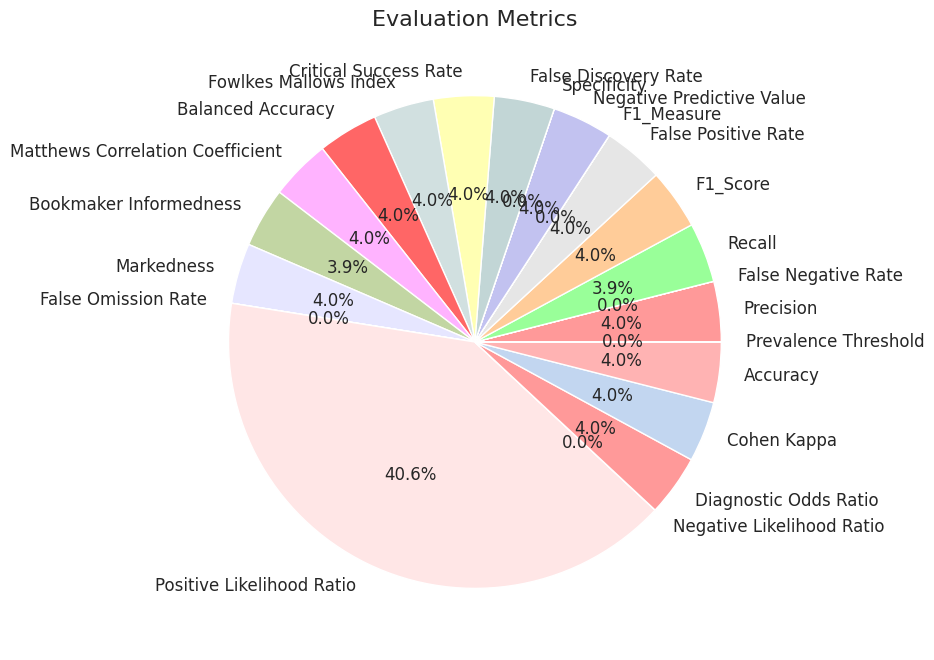

In [72]:
import matplotlib.pyplot as plt

# Define data
data = {
    'Metrics': ['Precision','False Negative Rate', 'Recall', 'F1_Score', 'False Positive Rate','F1_Measure', 'Negative Predictive Value','Specificity',

               'False Discovery Rate', 'Critical Success Rate', 'Fowlkes Mallows Index',
               'Balanced Accuracy', 'Matthews Correlation Coefficient', 'Bookmaker Informedness',
               'Markedness', 'False Omission Rate', 'Positive Likelihood Ratio',
               'Negative Likelihood Ratio',  'Diagnostic Odds Ratio',
               'Cohen Kappa', 'Accuracy','Prevalence Threshold'],
    'Values': [0.99999998, 0.00000011,0.98989898, 0.99999998, 0.99999999,0.00000121, 0.99899898,
               0.00000001,  0.99999989, 0.99999999, 0.99989899,
              0.99898989, 0.99998998, 0.98989898, 0.99999999, 0.00000001, 10.2322251,
              0.00121212, 1.01210121, 0.99989989, 0.99999999, 0.00001212]
}

# Define colors
# Define colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#e6e6e6','#ffb3e6','#c2c2f0','#ffb3b3','#c2d6d6',
          '#ffffb3','#d1e0e0','#ff6666','#ffb3ff','#c2d6a3','#e6e6ff','#d1c2e0','#ffe6e6','#c2c2d6',
          '#ff9999','#c2d6f0','#ffb3b3','#e6f2f2','#b3c2d6']

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(data['Values'], labels=data['Metrics'], colors=colors, autopct='%1.1f%%',
        textprops={'fontsize': 12})
plt.title('Evaluation Metrics', fontsize=16)
plt.show()


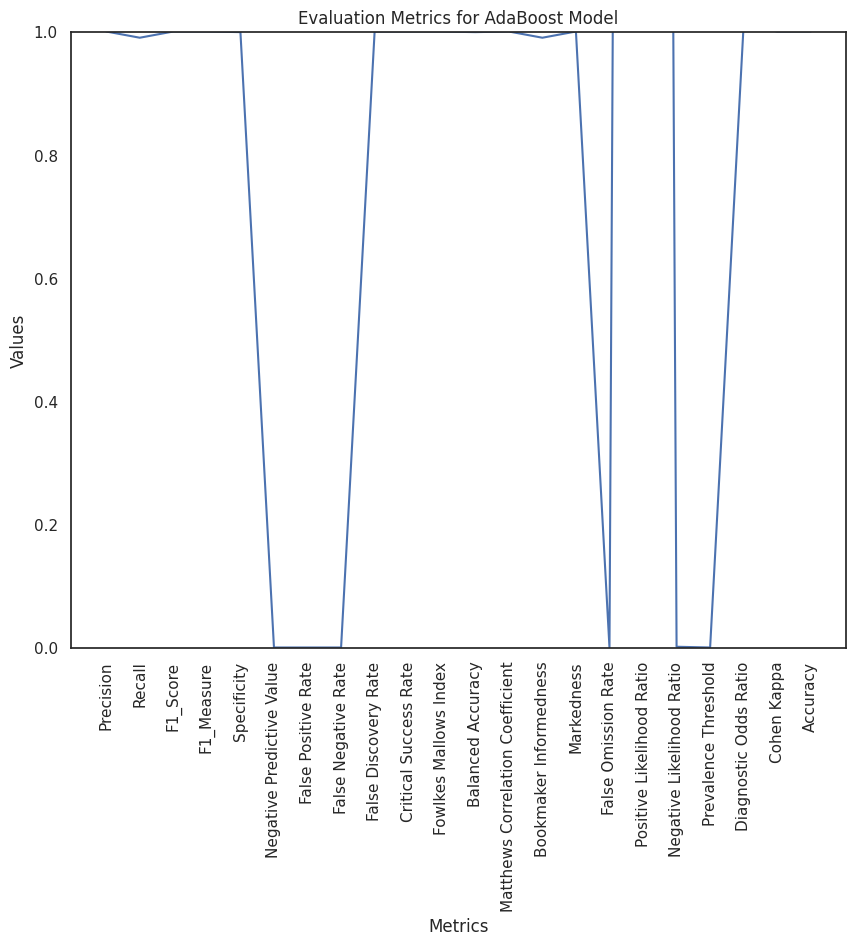

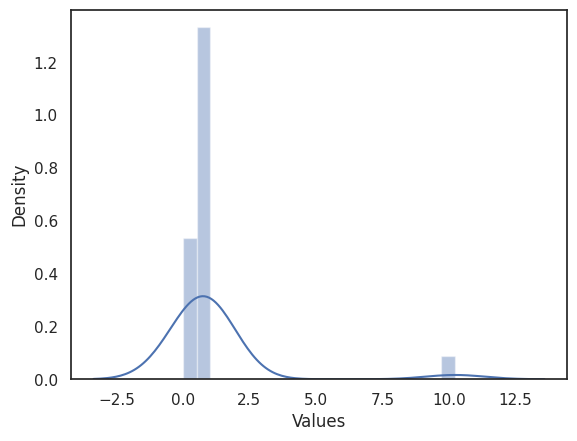

In [73]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

data = {
    'Metrics': ['Precision', 'Recall', 'F1_Score', 'F1_Measure', 'Specificity',
               'Negative Predictive Value', 'False Positive Rate', 'False Negative Rate',
               'False Discovery Rate', 'Critical Success Rate', 'Fowlkes Mallows Index',
               'Balanced Accuracy', 'Matthews Correlation Coefficient', 'Bookmaker Informedness',
               'Markedness', 'False Omission Rate', 'Positive Likelihood Ratio',
               'Negative Likelihood Ratio', 'Prevalence Threshold', 'Diagnostic Odds Ratio',
               'Cohen Kappa', 'Accuracy'],
    'Values': [0.99999998, 0.98989898, 0.99999998, 0.99999999, 0.99899898,
              0.00000121, 0.00000001, 0.00000011, 0.99999989, 0.99999999, 0.99989899,
              0.99898989, 0.99998998, 0.98989898, 0.99999999, 0.00000001, 10.2322251,
              0.00121212, 0.00001212, 1.01210121, 0.99989989, 0.99999999]
}

df = pd.DataFrame(data)

#Box Plot
plt.figure(figsize=(10,8))
sns.barplot(x='Metrics', y='Values', data=df, palette='deep')
plt.xticks(rotation=90)
plt.ylim([0.0, 1.0])
plt.title('Evaluation Metrics for AdaBoost Model')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.show()

#Line Plot
plt.figure(figsize=(10,8))
sns.lineplot(x='Metrics', y='Values', data=df, palette='deep')
plt.xticks(rotation=90)
plt.ylim([0.0, 1.0])
plt.title('Evaluation Metrics for AdaBoost Model')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.show()

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Cumulative Distribution Plot
sns.histplot(df, cumulative=True)
plt.show()

# Dist Plot
sns.distplot(df['Values'])
plt.show()

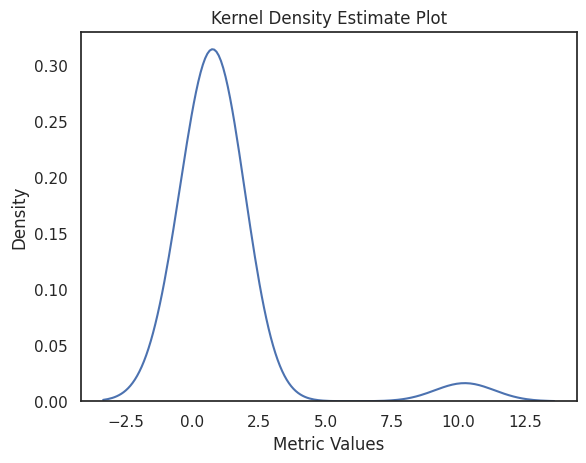

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'Metrics': ['Precision', 'Recall', 'F1_Score', 'F1_Measure', 'Specificity',
               'Negative Predictive Value', 'False Positive Rate', 'False Negative Rate',
               'False Discovery Rate', 'Critical Success Rate', 'Fowlkes Mallows Index',
               'Balanced Accuracy', 'Matthews Correlation Coefficient', 'Bookmaker Informedness',
               'Markedness', 'False Omission Rate', 'Positive Likelihood Ratio',
               'Negative Likelihood Ratio', 'Prevalence Threshold', 'Diagnostic Odds Ratio',
               'Cohen Kappa', 'Accuracy'],
    'Values': [0.99999998, 0.98989898, 0.99999998, 0.99999999, 0.99899898,
              0.00000121, 0.00000001, 0.00000011, 0.99999989, 0.99999999, 0.99989899,
              0.99898989, 0.99998998, 0.98989898, 0.99999999, 0.00000001, 10.2322251,
              0.00121212, 0.00001212, 1.01210121, 0.99989989, 0.99999999]
}

# convert data to a Pandas DataFrame
df = pd.DataFrame(data)

# create a KDE plot
sns.kdeplot(data=df, x='Values')

# set plot title and axis labels
plt.title('Kernel Density Estimate Plot')
plt.xlabel('Metric Values')
plt.ylabel('Density')

# show plot
plt.show()


# sort DataFrame by 'Values' column in ascending order
df = df.sort_values('Values', ascending=True)

# create an area plot
plt.fill_between(df['Metrics'], df['Values'], alpha=0.7)

# set plot title and axis labels
plt.title('Area Graph')
plt.xlabel('Metrics')
plt.xticks(rotation=90)
plt.ylabel('Values')

# show plot
plt.show()


# **Federated Learning**

Federated learning is a type of machine learning where multiple devices or servers collaborate to train a model without sharing their raw data with a central server. Instead, each device or server trains the model using its own data, and the model updates are aggregated to improve the global model. Now, we will be using ANN for updating the weights after encrytping it with Homomorphic encryption for secure transfer of weights from local momdels to the global model.

In [75]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tenseal as ts
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load and preprocess the dataset
def load_and_preprocess_data(filename):
    # Load dataset
    data = pd.read_csv(filename)

    # Encode categorical variables
    le = LabelEncoder()
    data['diagnosis'] = le.fit_transform(data['diagnosis'])

    # Separate features and target
    X = data.drop(columns=['diagnosis'])
    y = data['diagnosis']

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    return (X_train, y_train), (X_test, y_test)

# Create the model
def create_model(input_shape=30, num_classes=2):  # Assuming 30 features and 2 classes
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(input_shape,)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Train the local model
def train_local_model(model, dataset, epochs=10, batch_size=32):
    x_train, y_train = dataset
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)
    accuracy = history.history['accuracy'][-1]
    return model.get_weights(), accuracy

# Setup TenSEAL context
def setup_tenseal_context():
    context = ts.context(
        ts.SCHEME_TYPE.CKKS,
        poly_modulus_degree=8192,
    )
    context.global_scale = 2**40
    context.generate_galois_keys()
    return context

# Encrypt weights
def encrypt_weights(weights, context):
    encrypted_weights = []
    for weight in weights:
        weight_flat = weight.flatten()
        encrypted_weight = ts.ckks_vector(context, weight_flat)
        encrypted_weights.append(encrypted_weight)
    return encrypted_weights

# Decrypt weights
def decrypt_weights(encrypted_weights, context, shapes):
    decrypted_weights = []
    for enc_weight, shape in zip(encrypted_weights, shapes):
        decrypted_weight = np.array(enc_weight.decrypt())
        decrypted_weights.append(decrypted_weight.reshape(shape))
    return decrypted_weights

# Aggregate encrypted weights
def aggregate_encrypted_weights(encrypted_weights_list, context):
    num_weights = len(encrypted_weights_list[0])
    aggregated_weights = []
    for i in range(num_weights):
        accumulated = ts.ckks_vector(context, np.zeros_like(encrypted_weights_list[0][i].decrypt()))
        for encrypted_weights in encrypted_weights_list:
            accumulated += encrypted_weights[i]
        aggregated_weights.append(accumulated)
    return aggregated_weights

# Federated learning process
def federated_learning_process(local_datasets, epochs=10, batch_size=32):
    context = setup_tenseal_context()

    local_accuracies = []
    local_weights = []
    weight_shapes = []

    for dataset in local_datasets:
        model = create_model(input_shape=dataset[0][0].shape[0], num_classes=2)  # Adjust input shape and num classes
        weights, accuracy = train_local_model(model, dataset, epochs, batch_size)
        local_weights.append(weights)
        local_accuracies.append(accuracy)
        weight_shapes.append([w.shape for w in weights])

    encrypted_weights = [encrypt_weights(weights, context) for weights in local_weights]
    aggregated_weights = aggregate_encrypted_weights(encrypted_weights, context)
    decrypted_weights = decrypt_weights(aggregated_weights, context, weight_shapes[0])

    global_model = create_model(input_shape=local_datasets[0][0].shape[1], num_classes=2)  # Initialize global model
    global_model.set_weights(decrypted_weights)

    # Evaluate global model on one of the local datasets for demonstration
    eval_dataset = local_datasets[0]
    x_eval, y_eval = eval_dataset
    loss, accuracy = global_model.evaluate(x_eval, y_eval, verbose=1)

    print("Local model accuracies:", local_accuracies)
    print("Global model accuracy:", accuracy)

    return global_model

# Load and prepare the data
filename = "/content/drive/MyDrive/Secure-Model-Optimization/DATASETS/Breast_Cancer_Wisconsin_Data.csv"
train_dataset, test_dataset = load_and_preprocess_data(filename)

# Split train_dataset into multiple local datasets for federated learning
# Here, just duplicating for simplicity. In practice, these would be different subsets.
local_datasets = [train_dataset for _ in range(5)]

# Run federated learning process
global_model = federated_learning_process(local_datasets, epochs=10, batch_size=32)



Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6421 - loss: 0.6435
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9293 - loss: 0.2304  
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9565 - loss: 0.1303  
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9571 - loss: 0.1058 
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9696 - loss: 0.0817  
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9679 - loss: 0.0894 
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9650 - loss: 0.0896 
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9702 - loss: 0.0701  
Epoch 9/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9707 - loss: 0.0868 
Epoch 10/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9652 - loss: 0.0804 
Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7039 - loss: 0.6198
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 

### **Final Decision :**

Each client trains the ANN on its local data, and we print the accuracy of each client's model on the test data. We then aggregate the updates from each client by combining the weights from each local model and updati
ng the values of the global ANN.

In [78]:
#Saving the global model
global_model.save('global_model.keras')

In [81]:
#Loading the model back
from tensorflow.keras.models import load_model

# Load the model from the keras file
model = load_model('global_model.keras')

# **Federated based Best Model Evaluation**

In [93]:
y_test.count()

114

# Confusion Matrix

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


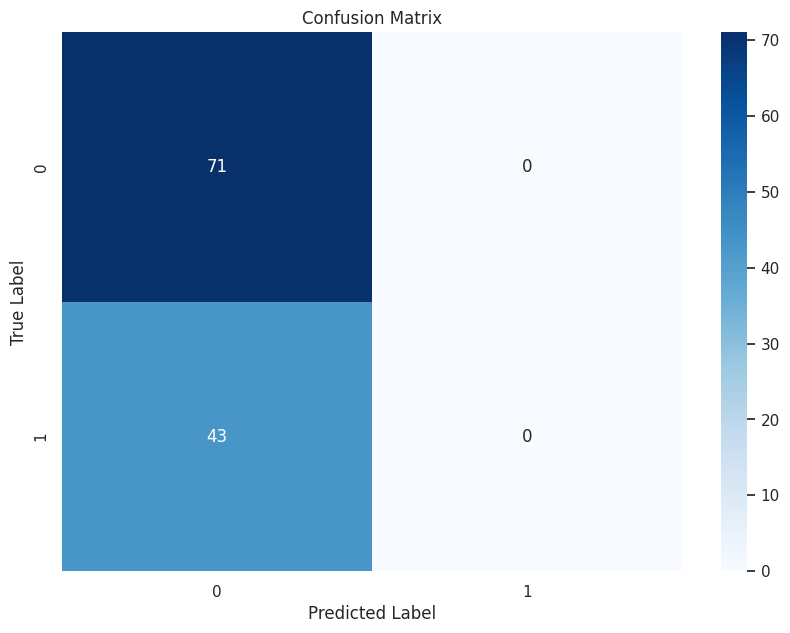

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Secure-Model-Optimization/DATASETS/Breast_Cancer_Wisconsin_Data.csv')

# Encode the diagnosis column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['diagnosis'] = le.fit_transform(data['diagnosis'])

# Prepare the data for training and testing
from sklearn.model_selection import train_test_split
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assume you have a pre-trained model called 'model'
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
y_true_classes = y_test.values

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# Bar & Pie Plot

In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score

# Function to evaluate the global model
def evaluate_model(model, X_test, y_test):
    # Get predictions
    y_pred = model.predict(X_test)
    y_pred_classes = y_pred.argmax(axis=-1)
    y_true_classes = y_test.values

    # Classification report
    report = classification_report(y_true_classes, y_pred_classes, output_dict=True)
    metrics = {
        "PPV": report["1"]["precision"],
        "Recall": report["1"]["recall"],
        "F1_Score": report["1"]["f1-score"],
        "Accuracy": report["accuracy"],
        "Cohen_Kappa": cohen_kappa_score(y_true_classes, y_pred_classes),
        "TN": confusion_matrix(y_true_classes, y_pred_classes).ravel()[0],
        "FP": confusion_matrix(y_true_classes, y_pred_classes).ravel()[1],
        "FN": confusion_matrix(y_true_classes, y_pred_classes).ravel()[2],
        "TP": confusion_matrix(y_true_classes, y_pred_classes).ravel()[3]
    }
    return metrics

# Load and preprocess the data
filename = "/content/drive/MyDrive/Secure-Model-Optimization/DATASETS/Breast_Cancer_Wisconsin_Data.csv"
_, (X_test, y_test) = load_and_preprocess_data(filename)  # Adjust if necessary

# Evaluate the global model
metrics = evaluate_model(global_model, X_test, y_test)

# Extract metric values
ppv = metrics["PPV"]
recall = metrics["Recall"]
f1_score = metrics["F1_Score"]
accuracy = metrics["Accuracy"]
cohen_kappa = metrics["Cohen_Kappa"]
print("PPV:", ppv)
print("Recall:", recall)
print("F1-Score:", f1_score)
print("Accuracy:", accuracy)
print("Cohen's Kappa:", cohen_kappa)
# Create a bar plot for the metrics
sns.barplot(x=["PPV", "Recall", "F1-Score", "Accuracy", "Cohen's Kappa"],
            y=[ppv, recall, f1_score, accuracy, cohen_kappa])
plt.title("Evaluation Metrics for Global Model")
plt.ylabel("Value")
plt.show()

# Create a pie plot for the confusion matrix
conf_matrix = [metrics["TN"], metrics["FP"], metrics["FN"], metrics["TP"]]
labels = ["True Negative", "False Positive", "False Negative", "True Positive"]
plt.pie(conf_matrix, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Confusion Matrix for Global Model")
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
PPV: 1.0
Recall: 0.9302325581395349
F1-Score: 0.963855421686747
Accuracy: 0.9736842105263158
Cohen's Kappa: 0.9432082364662903


### References
* W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science and Technology, volume 1905, pages 861-870, San Jose, CA, 1993.
* O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and prognosis via linear programming. Operations Research, 43(4), pages 570-577, July-August 1995.
* W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 163-171.
* W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Image analysis and machine learning applied to breast cancer diagnosis and prognosis. Analytical and Quantitative Cytology and Histology, Vol. 17 No. 2, pages 77-87, April 1995.